Auteur : [Maximo Rose](https://maximorose.eu/)

Licence : [CC BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/)

-------------------------------------------------------------------------------------

# Analyse Generale

Dans ce Notebook on ne croisera pas encore les resultats des differentes questions. On se contentera d'etudier les volumes generaux pour definir les fonctions de bases

### Questionnaire "Opportunite GP" ( id = YvBfAdHB )

- Regroupez vos questions par groupes pour un traitement simplifie des resultats
- _Use groups to categorize your fields. It will make processing easier_

Initialisation des donnees : 

1. Recuperation de la structure du questionnaire via l'API
1. Recuperation des donnees sous la forme d'un CSV 

"tfs" est l'objet associe a un questionnaire typeform


In [1]:
import mbr_typeform as mbr

#-------------------------------------------------------------------------
# Initialisation de la structure / changer 'formid' pour votre formulaire
# Initializing structure / change 'formid' to set your form id
#-------------------------------------------------------------------------

# Initialisation de tfs via l'ID du questionnaire
tfs = mbr.tf_struct(formid='YvBfAdHB')

# Recupere toute la structure du questionnaire que retoune l'API
struct_d = tfs.get_form_structure()
# Recupere le titre du questionnaire
form_title = tfs.get_title()
# Recupere seulement les champs associes aux questions
form_questions = tfs.get_fields()
# Recupere le fichier de reponse dans le dossier 'responses'. Le fichier doit etre nomme "res_{id questionnaire}.csv"
form_responses = tfs.get_form_responses()
# Retourne le nombre de reponses totales
nb_responses = tfs.get_nb_responses()
# Retourne et ecrit les groupes definis dans le questionnaire
form_groups = tfs.get_groups()




#-------------------------------------------------------------------------
# Definition de quelques preferences graphiques
#-------------------------------------------------------------------------

# Liste de couleurs preferees
myfavcolors = ['#f2cb26', '#00a154', '#0083c6', '#dc0036', '#fc8934', '#99248B', '#fb85a7', '#00b3f0']
# Eclatement prefere pour les pie charts
pie_fav_eclat = 0.005
# Pie charts title
pie_titlesize = 14
# Tick size pour les barcharts
bar_ticksize = 12
# Title size pour les barcharts
bar_titlesize = 16
# Axis label size pour les barcharts
bar_axislabelsize = 14
# Patch number size pour les barcharts
bar_patchsize = 13



Group 1 : Apprenons à  se connaître
Group 2 : Votre rapport au numérique...
Group 3 : Enseignement et éducation...
Group 4 : L'offre culturelle numérique
Group 5 : Les sujets qui vous interessent
Group 6 : Pour conclure


N.B : 

1. Pour les questions a choix unique on ne fait que des camemberts.
1. Pour les questions a choix multiple, opinion scale, ratings, on fait des barcharts

Quand on fera des croisements on sera plus original, on aura des teckels et des chihuahua degeneres

-------------------------------------------------------------------------

# GROUP 1 : Apprenons à  se connaître // Group index 0

-------------------------------------------------------------------------

## 1.A - Sexes, hmmm... (id : oYqnhtesJuF5) // Single Choice

In [2]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Le premier group a pour index 0 
gidx = 0
# ID de la question
qid = 'oYqnhtesJuF5'

# Get question name, question options, result dataframe of each option
# Retourne le titre de la question, la liste des options possibles, la liste des dataframe de resultat associe a chaque option
qsex_title, sex_lbls, sex_dtf = tfs.get_results(gidx=gidx,qid=qid)

# Rappel des options :
print("Rappel des sexes possibles :\n ",sex_lbls)

Rappel des sexes possibles :
  ['Non genré', 'Fluide', 'Un homme', 'Une femme']


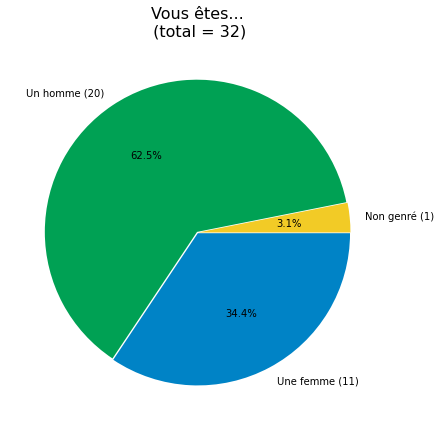

In [3]:
# Clean them for nicer plot (no need of 0 results)
# Retoune une liste reduite de labels et la taille des dataframe associes (en gros on supprime les options qui n'ont eut aucun resultat)
cln_sex_lbl, cln_sex_dtf = mbr.clean_lists_for_cheesepie(labels=sex_lbls, values=sex_dtf)


#GRAPH SET UP
#------------
# Ajouter le nombre de respondants correspondant au label
for i in range(len(cln_sex_lbl)) :
    cln_sex_lbl[i] += ' ('+str(cln_sex_dtf[i])+')'

# Set explode paramater based on favarite value
# Cree un tuple de la taille du nombre "clean" de labels de valeur egale a l'eclatement favoris
explode = (pie_fav_eclat,)*len(cln_sex_lbl)

# show plot
fig = plt.figure(figsize =(10, 7))
plt.pie(cln_sex_dtf, labels = cln_sex_lbl, autopct='%1.1f%%', colors=myfavcolors, explode = explode)
plt.title(qsex_title +'\n (total = '+ str(nb_responses) +')', size = bar_titlesize)
plt.show()

## 1.B - Tranche d'age ( id = BZsILkKYGzKQ ) // Single choice

In [4]:
# Get labels and results
qage_label, age_lbls, age_dtf = tfs.get_results(gidx=gidx,qid='BZsILkKYGzKQ')

# Rappel des options :
print("Rappel des ages possibles :\n ",age_lbls)

Rappel des ages possibles :
  ['Moins de 18 ans', 'Entre 18 et 25 ans', 'Entre 26 et 35 ans', 'Entre 36 et 50 ans', 'Entre 51 et 75 ans', '76 ans et plus']


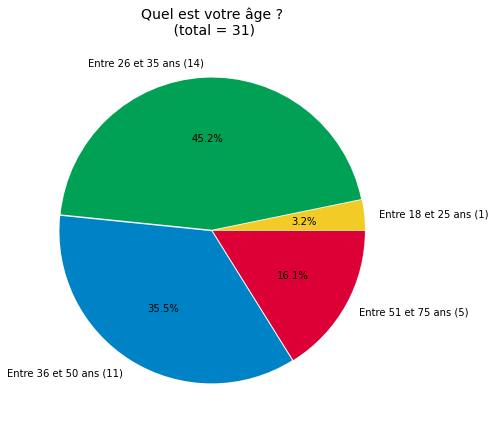

In [5]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Clean them for nicer plot (no need of 0 results)
cln_age_lbls, cln_age_votes = mbr.clean_lists_for_cheesepie(labels=age_lbls, values=age_dtf)

nb_valid_resp = 0
for i in range(len(age_dtf)) :
    nb_valid_resp += age_dtf[i].shape[0]

#GRAPH SET UP
#------------
# Ajouter le nombre de respondants correspondant au label
for i in range(len(cln_age_lbls)) :
    cln_age_lbls[i] += ' ('+str(cln_age_votes[i])+')'
    
# Set explode paramater based on favarite value
# Cree un tuple de la taille du nombre "clean" de labels de valeur egale a l'eclatement favoris
explode = (pie_fav_eclat,)*len(cln_age_lbls)

# show plot
fig = plt.figure(figsize =(10, 7))
plt.pie(cln_age_votes, labels = cln_age_lbls, autopct='%1.1f%%', colors=myfavcolors, explode = explode)
plt.title(qage_label +'\n (total = '+ str(nb_valid_resp) +')', size = pie_titlesize)
plt.show()

### Tranche d'age par sexe

Dans ce bloc, on va juste croiser tranche d'age et sexes - c'est-a-dire "trancher les sexes", pour se montrer qu'on peut le faire. Mais on fera toutes les analyses croisees dans d'autres Notebooks. Sinon, si mes fichiers sont trop gros, ca me gave. Je suis un grossophobe de l'information.

In [6]:
# import matplotlib.pyplot as plt
# import matplotlib.colors as mcolors

# # Definition de la forme des suplots en nombre de colonnes fixe
# nbcol = 2
# # recuperer le nombre de sexes
# nbsextotal = len(sex_lbls)
# nbsexpossibles = len(cln_sex_lbl)
# # En deduire le nombre de ligne
# nbligne = 1 + int(nbsexpossibles/nbcol)


# list_lbl = [[]]*nbsextotal
# list_res = [[]]*nbsextotal
# # Ajouter le nombre de respondants correspondant au label
# for i in range(nbsextotal) :
#     labels_m, dtf_res_m = mbr.df_singlecolumn_subresults(main_dtf=sex_dtf[i], l_options=age_lbls, q_name=qage_label)
#     cln_age_m, cln_dtf_m = mbr.clean_lists_for_cheesepie(labels=labels_m, values=dtf_res_m)
#     print("Rappel des ages possibles :\n ",cln_age_m)
#     print("values :\n ", cln_dtf_m)
#     list_lbl[i].append(cln_age_m)
#     list_res[i].append(cln_dtf_m)


# # Set explode paramater based on favarite value
# # Cree un tuple de la taille du nombre "clean" de labels de valeur egale a l'eclatement favoris
# explode = (fav_eclat,)*len(cln_age_lbls)

# # show plot
# fig = plt.figure(figsize =(16, 9))

# for i in range(1, nbsextotal) :
#     if list_lbl[i-1] != [] :
#         plt.subplot(nbligne, nbcol, i)
#         plt.plot(list_lbl[i-1], list_res[i-1])
#         plt.title('subplot : ' + sex_lbls[i-1])

## 1.C - Vivez-vous en France ? (id = M2yM4x72oiV3) // Single Choice

In [7]:
# Get labels and results
qFrance, France_lbls, france_yn_dtf = tfs.get_results(gidx=gidx,qid='M2yM4x72oiV3')

# Rappel des options :
print("Rappel des possibilites pour 'Habitez-vous en France ?' :\n ",France_lbls)


Rappel des possibilites pour 'Habitez-vous en France ?' :
  ['oui', 'non']


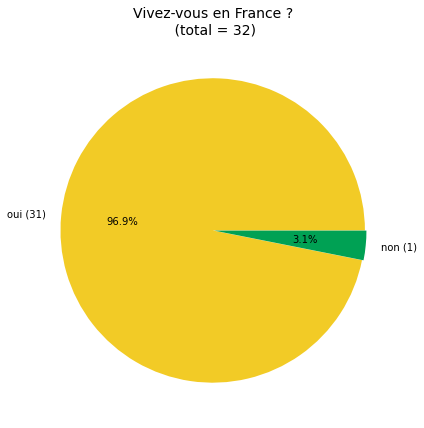

In [8]:
# Clean them for nicer plot (no need of 0 results)
cln_France_lb, cln_dtf_France = mbr.clean_lists_for_cheesepie(labels=France_lbls, values=france_yn_dtf)

nb_valid_resp = 0
for i in range(len(france_yn_dtf)) :
    nb_valid_resp += france_yn_dtf[i].shape[0]


#GRAPH SET UP
#------------
# Ajouter le nombre de respondants correspondant au label
for i in range(len(cln_France_lb)) :
    cln_France_lb[i] += ' ('+str(cln_dtf_France[i])+')'
    
# Set explode paramater based on favarite value
# Cree un tuple de la taille du nombre "clean" de labels de valeur egale a l'eclatement favoris
explode = (pie_fav_eclat,)*len(cln_France_lb)

# show plot
fig = plt.figure(figsize =(10, 7))
plt.pie(cln_dtf_France, labels = cln_France_lb, autopct='%1.1f%%', colors=myfavcolors, explode = explode)
plt.title(qFrance +'\n (total = '+ str(nb_valid_resp) +')', size = pie_titlesize)
plt.show()

## 1.D - Dernier diplome ? (id = 8WoLUtHsWKKJ) // Single Choice

In [9]:
# Get labels and results
qdiplome, dpl_labels, diplome_dtfs = tfs.get_results(gidx=gidx,qid='8WoLUtHsWKKJ')

# Rappel des options :
print("Rappel des diplomes possibles :\n ",dpl_labels)

Rappel des diplomes possibles :
  ['Formation professionnelle', 'Bac +2', 'Licence', "Master / Diplôme d'ingénieur", 'Doctorat']


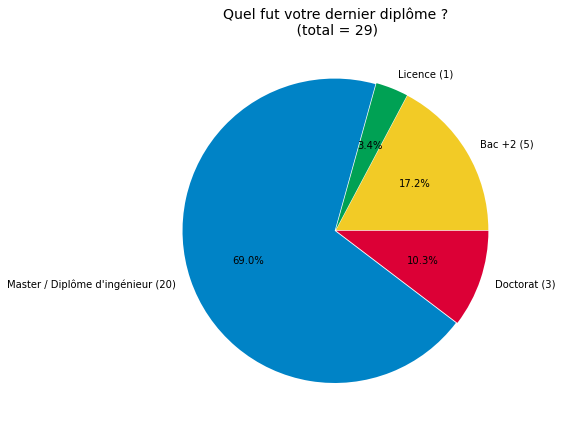

In [10]:
# Clean them for nicer plot (no need of 0 results)
cln_dpl_labels, cln_diplome_dtfs = mbr.clean_lists_for_cheesepie(labels=dpl_labels, values=diplome_dtfs)

nb_valid_resp = 0
for i in range(len(diplome_dtfs)) :
    nb_valid_resp += diplome_dtfs[i].shape[0]


#GRAPH SET UP
#------------
# Ajouter le nombre de respondants correspondant au label
for i in range(len(cln_dpl_labels)) :
    cln_dpl_labels[i] += ' ('+str(cln_diplome_dtfs[i])+')'
    
# Set explode paramater based on favarite value
# Cree un tuple de la taille du nombre "clean" de labels de valeur egale a l'eclatement favoris
explode = (pie_fav_eclat,)*len(cln_dpl_labels)

# show plot
fig = plt.figure(figsize =(10, 7))
plt.pie(cln_diplome_dtfs, labels = cln_dpl_labels, autopct='%1.1f%%', colors=myfavcolors, explode = explode)
plt.title(qdiplome +'\n (total = '+ str(nb_valid_resp) +')', size = pie_titlesize)
plt.show()

## TODO : Verifier pourquoi je n'ai que 24 reponses la

## 1.E - Secteur public ? (id = vMmUInJ5B4C9) // Single Choice


In [11]:
# Get labels and results
qPublic, public_lbls, public_yn_dtf = tfs.get_results(gidx=gidx,qid='vMmUInJ5B4C9')

# Rappel des options :
print("Rappel des possibilite pour le secteur public :\n ",public_lbls)


Rappel des possibilite pour le secteur public :
  ['oui', 'non']


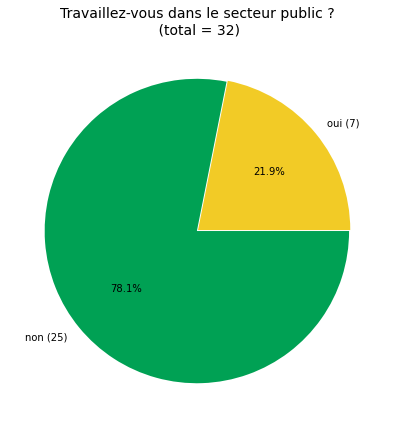

In [12]:
cln_public_lb, cln_dtf_public = mbr.clean_lists_for_cheesepie(labels=public_lbls, values=public_yn_dtf)

nb_valid_resp = 0
for i in range(len(public_yn_dtf)) :
    nb_valid_resp += public_yn_dtf[i].shape[0]


#GRAPH SET UP
#------------
# Ajouter le nombre de respondants correspondant au label
for i in range(len(cln_public_lb)) :
    cln_public_lb[i] += ' ('+str(cln_dtf_public[i])+')'
    
# Set explode paramater based on favarite value
# Cree un tuple de la taille du nombre "clean" de labels de valeur egale a l'eclatement favoris
explode = (pie_fav_eclat,)*len(cln_public_lb)

# show plot
fig = plt.figure(figsize =(10, 7))
plt.pie(cln_dtf_public, labels = cln_public_lb, autopct='%1.1f%%', colors=myfavcolors, explode = explode)
plt.title(qPublic +'\n (total = '+ str(nb_valid_resp) +')', size = pie_titlesize)
plt.show()

## 1.F - Si secteur public, Secteur culturel ? ( id = 4dOyMP97omhJ ) // Single choice

In [13]:
# Get labels and results
qCulture, culture_lbls, culture_yn_dtf = tfs.get_results(gidx=gidx,qid='4dOyMP97omhJ')

# Rappel des options :
print("Rappel des possibilite pour le secteur culturel :\n ",culture_lbls)

Rappel des possibilite pour le secteur culturel :
  ['oui', 'non']


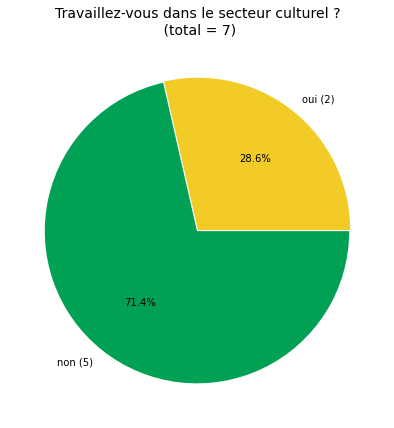

In [14]:
cln_culture_lb, cln_dtf_culture = mbr.clean_lists_for_cheesepie(labels=culture_lbls, values=culture_yn_dtf)

nb_valid_resp = 0
for i in range(len(culture_yn_dtf)) :
    nb_valid_resp += culture_yn_dtf[i].shape[0]


#GRAPH SET UP
#------------
# Ajouter le nombre de respondants correspondant au label
for i in range(len(cln_culture_lb)) :
    cln_culture_lb[i] += ' ('+str(cln_dtf_culture[i])+')'
    
# Set explode paramater based on favarite value
# Cree un tuple de la taille du nombre "clean" de labels de valeur egale a l'eclatement favoris
explode = (pie_fav_eclat,)*len(cln_culture_lb)

# show plot
fig = plt.figure(figsize =(10, 7))
plt.pie(cln_dtf_culture, labels = cln_culture_lb, autopct='%1.1f%%', colors=myfavcolors, explode = explode)
plt.title(qCulture +'\n (total = '+ str(nb_valid_resp) +')', size = pie_titlesize)
plt.show()

## 1.G - Specialites / domaine de competence ( id = OnnjlaZauNJ0 ) // Single choice

In [15]:
# Get labels and results
qScpecialite, spec_lbls, spec_dtfs = tfs.get_results(gidx=0,qid='OnnjlaZauNJ0')

# Rappel des options :
print("Rappel des specialites possibles :\n ",spec_lbls)

POOOOO
Rappel des specialites possibles :
  ["Services d'informations", 'Budget / Finance / Compta', 'Juridique / Droits', 'Bâtiment / Sécurité physique', 'Développement commercial', 'Communication / Partenariats / Evénementiel', 'Ressources humaines / Santé / Social', 'Restauration / Tourisme', 'Other']


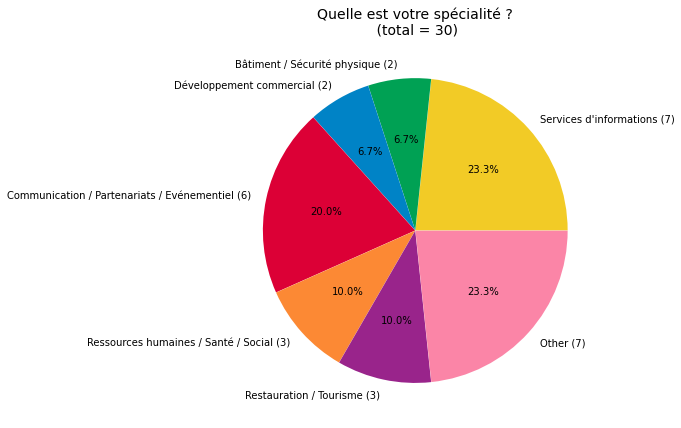

In [16]:
cln_spec_lb, cln_spec_votes = mbr.clean_lists_for_cheesepie(labels=spec_lbls, values=spec_dtfs)

nb_valid_resp = 0
for i in range(len(spec_dtfs)) :
    nb_valid_resp += spec_dtfs[i].shape[0]


#GRAPH SET UP
#------------
# Ajouter le nombre de respondants correspondant au label
for i in range(len(cln_spec_lb)) :
    cln_spec_lb[i] += ' ('+str(cln_spec_votes[i])+')'
    
# Set explode paramater based on favarite value
# Cree un tuple de la taille du nombre "clean" de labels de valeur egale a l'eclatement favoris
explode = (pie_fav_eclat/4,)*len(cln_spec_lb)

# show plot
fig = plt.figure(figsize =(10, 7))
plt.pie(cln_spec_votes, labels = cln_spec_lb, autopct='%1.1f%%', colors=myfavcolors, explode = explode)
plt.title(qScpecialite +'\n (total = '+ str(nb_valid_resp) +')', size = pie_titlesize)
plt.show()

----------------------------------------------------

#  GROUP 2 - Votre rapport au numérique // Group index = 1

--------------------------------------------------

In [17]:
gidx = 1

## 2.A - Quand utilisez-vous l'IT ? ( id =  EyykV9VMHRBS ) // Single choice

In [18]:
# Get labels and results
qtimetoIT, it_time_lbls, it_time_dtf = tfs.get_results(gidx=1,qid='EyykV9VMHRBS')

# Rappel des options :
print("Rappel des temps d'informatique possibles :\n ",it_time_lbls)

Rappel des temps d'informatique possibles :
  ['Dans la vie privée', 'Dans la vie professionnelle', 'Tout le temps', 'Le moins possible']


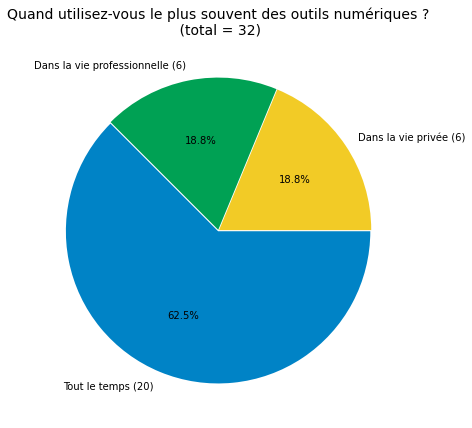

In [19]:
cln_itt_labels, cln_itt_votes = mbr.clean_lists_for_cheesepie(labels=it_time_lbls, values=it_time_dtf)

nb_valid_resp = 0
for i in range(len(it_time_dtf)) :
    nb_valid_resp += it_time_dtf[i].shape[0]


#GRAPH SET UP
#------------
# Ajouter le nombre de respondants correspondant au label
for i in range(len(cln_itt_labels)) :
    cln_itt_labels[i] += ' ('+str(cln_itt_votes[i])+')'
    
# Set explode paramater based on favarite value
# Cree un tuple de la taille du nombre "clean" de labels de valeur egale a l'eclatement favoris
explode = (pie_fav_eclat,)*len(cln_itt_labels)

# show plot
fig = plt.figure(figsize =(10, 7))
plt.pie(cln_itt_votes, labels = cln_itt_labels, autopct='%1.1f%%', colors=myfavcolors, explode = explode)
plt.title(qtimetoIT +'\n (total = '+ str(nb_valid_resp) +')', size = pie_titlesize)
plt.show()

### TODO : Quand les gens font-ils de l'IT (Scpecialite // Time to IT)


------------------------------------------------------------------------------------------------


## 2.B - Plutot par plaisir ou par necessite ? ( id = r14e6RHnmlxH ) // Single choice

In [20]:
q_id = 'r14e6RHnmlxH'

# Get labels and results
q_Plaisir, it_plaisir_lbls, it_plaisir_dtf = tfs.get_results(gidx=1,qid=q_id)

# Rappel des options :
print("Rappel des temps d'informatiques possibles :\n ",it_plaisir_lbls)


Rappel des temps d'informatiques possibles :
  ['Plaisir', 'Nécessité']


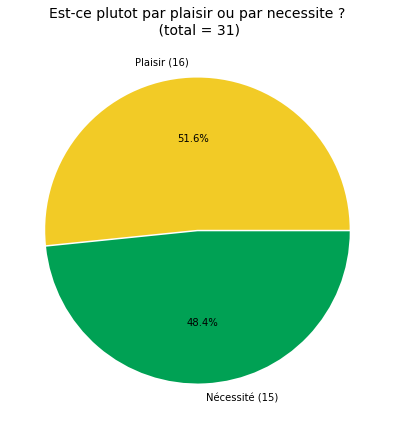

In [21]:
cln_plaisir_labels, cln_plaisir_votes = mbr.clean_lists_for_cheesepie(labels=it_plaisir_lbls, values=it_plaisir_dtf)

nb_valid_resp = 0
for i in range(len(it_plaisir_dtf)) :
    nb_valid_resp += it_plaisir_dtf[i].shape[0]


#GRAPH SET UP
#------------
# Ajouter le nombre de respondants correspondant au label
for i in range(len(cln_plaisir_labels)) :
    cln_plaisir_labels[i] += ' ('+str(cln_plaisir_votes[i])+')'
    
# Set explode paramater based on favarite value
# Cree un tuple de la taille du nombre "clean" de labels de valeur egale a l'eclatement favoris
explode = (pie_fav_eclat,)*len(cln_plaisir_labels)

# show plot
fig = plt.figure(figsize =(10, 7))
plt.pie(cln_plaisir_votes, labels = cln_plaisir_labels, autopct='%1.1f%%', colors=myfavcolors, explode = explode)
plt.title(q_Plaisir +'\n (total = '+ str(nb_valid_resp) +')', size = pie_titlesize)
plt.show()

## 2.C - Quels objets informatiques possedez-vous ? ( id = DeUtJwpfRd1O ) // Multiple choice

In [22]:
qidq = 'DeUtJwpfRd1O'
# Get labels and results
q_appareils, appareils_lbls, appareils_dtf = tfs.get_results(gidx=1,qid=qidq)

# Rappel des options :
print("Rappel des options possibles :\n ",appareils_lbls)

Rappel des options possibles :
  ['Smartphone professionnel', 'Smartphone personnel', 'Ordinateur personnel', 'Ordinateur professionnel', 'Des objets connectés (Smart watch, Garmin, etc.)', 'Rien']


In [23]:
cln_appareils_labels, cln_appareils_nb = mbr.clean_lists_multiplechoices_histogramme(labels=appareils_lbls, values=appareils_dtf, nbreps = nb_responses)

df_Rien = tfs.get_question_specific_resp_dtf(gidx=1, qid=qidq, label='Rien')

nb_cyberminimaliste = 0

if df_Rien is not None :
    nb_cyberminimaliste = df_Rien.shape[0]
    print ("On a trouve "+ str(nb_cyberminimaliste) + " cyberminimalistes")
else :
    print("Personne n'a coche 'Rien'")

nb_valid_resp = 0
for i in range(len(appareils_dtf)) :
    nb_valid_resp += appareils_dtf[i].shape[0]

nb_valid_resp -= nb_cyberminimaliste

On a trouve 0 cyberminimalistes


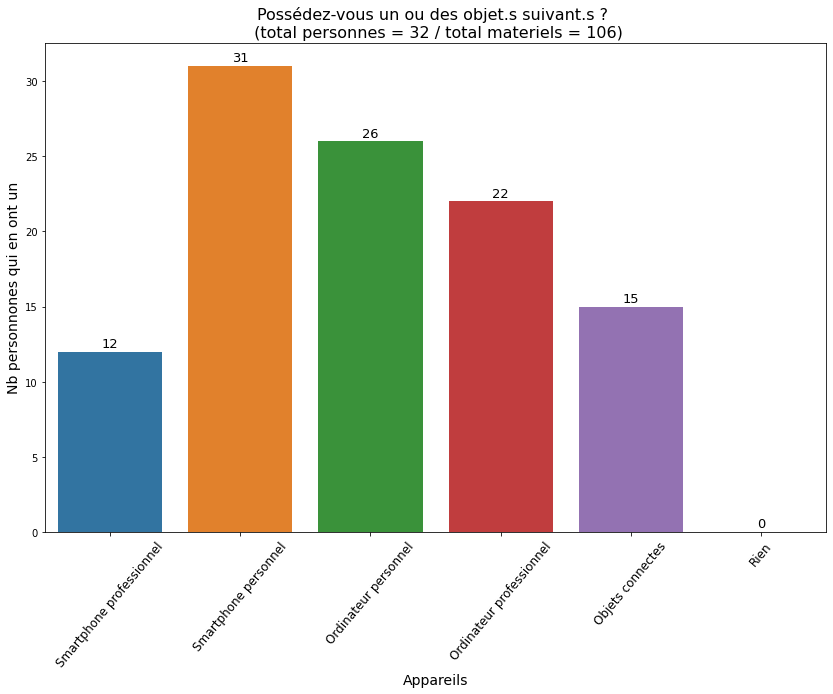

In [24]:
# Reference : https://www.geeksforgeeks.org/how-to-annotate-bars-in-barplot-with-matplotlib-in-python/
import pandas as pd
import seaborn as sns

cln_appareils_labels[-2] = 'Objets connectes'

data = {"Appareil" : cln_appareils_labels, "nbappareils" : cln_appareils_nb}

df = pd.DataFrame(data, columns=['Appareil', 'nbappareils'])

# Defining the plot size
plt.figure(figsize=(14, 9))
  
# Defining the values for x-axis, y-axis
# and from which datafarme the values are to be picked
plots = sns.barplot(x="Appareil", y="nbappareils", data=df)
  
# Iterrating over the bars one-by-one
for bar in plots.patches:
    
  # Using Matplotlib's annotate function and
  # passing the coordinates where the annotation shall be done
  # x-coordinate: bar.get_x() + bar.get_width() / 2
  # y-coordinate: bar.get_height()
  # free space to be left to make graph pleasing: (0, 8)
  # ha and va stand for the horizontal and vertical alignment
    plots.annotate(format(bar.get_height(), '.0f'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=bar_patchsize, xytext=(0, 8),
                   textcoords='offset points')
  
# Setting the label for x-axis
plt.xlabel("Appareils", size=bar_axislabelsize)
  
# Setting the label for y-axis
plt.ylabel("Nb personnones qui en ont un", size=bar_axislabelsize)
  
# Setting the title for the graph
plt.title(q_appareils + " \n (total personnes = "+str(nb_responses)+" / total materiels = " + str(nb_valid_resp) + ")", size = bar_titlesize)

plt.xticks(rotation=50, size = bar_ticksize)
# Si je fais des plots de taux, ajouter echelle de 0 a 100
# plt.ylim([0,100])
  
# Fianlly showing the plot
plt.show()

In [25]:
meanapp = tfs.get_meanNbItem_in_multipleChoice(possiblechoices = appareils_lbls, label_expt = 'Rien')

print('Les gens ont en moyenne ' + str(meanapp) +' appareils informatique')

Les gens ont en moyenne 3.3125 appareils informatique


## TODO : Recuperer la moyenne du nombre d'equipement des moins aises en informatique

## TODO : Ou bien de ceux qui font appel a des proches en cas de probleme

## 2.D - AISANCE PERSONNELLE IT (id = bK9T5Pen4AB0 ) // Opinion Scale

Pour les croisements de donnees : https://www.pythonpool.com/matplotlib-heatmap/



In [26]:
qidq = 'bK9T5Pen4AB0'
# Get labels and results
q_aisance, aisance_lbls, op_scale = tfs.get_results(gidx=1,qid=qidq)

# Rappel des options :
print("Taille de l'opinion :\n ",op_scale)

# form_responses = liste de toutes les reponses sous forme de dataframe

Taille de l'opinion :
  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


https://plotly.com/python/bubble-charts/



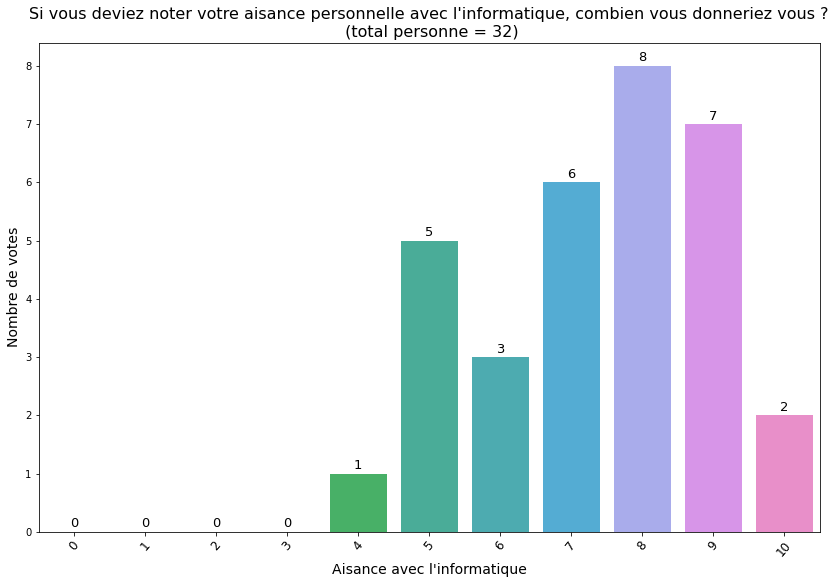

In [27]:
# Reference : https://www.geeksforgeeks.org/how-to-annotate-bars-in-barplot-with-matplotlib-in-python/
import pandas as pd
import seaborn as sns


nb_of_pips = []
moyenne_aisance = 0.0
total_notes = 0

for i in range(len(op_scale)) :
    df = form_responses[form_responses[q_aisance] == op_scale[i]]
    nb_votes = df.shape[0]
    nb_of_pips.append(nb_votes)
    total_notes += nb_votes*op_scale[i]

moyenne_aisance = total_notes / nb_responses

data = {"Note" : op_scale, "Votes" : nb_of_pips}

df = pd.DataFrame(data, columns=['Note', 'Votes'])

# Defining the plot size
plt.figure(figsize=(14, 9))
  
# Defining the values for x-axis, y-axis
# and from which datafarme the values are to be picked
plots = sns.barplot(x="Note", y="Votes", data=df)
  
# Iterrating over the bars one-by-one
for bar in plots.patches:
    
  # Using Matplotlib's annotate function and
  # passing the coordinates where the annotation shall be done
  # x-coordinate: bar.get_x() + bar.get_width() / 2
  # y-coordinate: bar.get_height()
  # free space to be left to make graph pleasing: (0, 8)
  # ha and va stand for the horizontal and vertical alignment
    plots.annotate(format(bar.get_height(), '.0f'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=bar_patchsize, xytext=(0, 8),
                   textcoords='offset points')
  
# Setting the label for x-axis
plt.xlabel("Aisance avec l'informatique", size=bar_axislabelsize)
  
# Setting the label for y-axis
plt.ylabel("Nombre de votes", size=bar_axislabelsize)
  
# Setting the title for the graph
plt.title(q_aisance + "\n (total personne = "+str(nb_responses)+')', size=bar_titlesize)

plt.xticks(rotation=50, size = bar_ticksize)
# Si je fais des plots de taux, ajouter echelle de 0 a 100
# plt.ylim([0,100])
  
# Fianlly showing the plot
plt.show()

In [28]:
print('Moyenne generale : '+str(moyenne_aisance))

Moyenne generale : 7.375


## TODO : Plotter sur un meme graph mais de couleur differente (une par sexe)
## TODO : Plotter sur un meme graph en fonction de l'age
## TODO : Plotter sur un meme graph en fonction du metier

## 2.E - Confiance donnees personnelles ? ( id = IihvSDBsSpUH ) // Opinion scale

In [29]:
qidq = 'IihvSDBsSpUH'
# Get labels and results
q_confiance, confiance_lbls, op_scale_c = tfs.get_results(gidx=1,qid=qidq)

# Rappel des options :
print("Taille de l'opinion :\n ",op_scale_c)

# form_responses = liste de toutes les reponses sous forme de dataframe

Taille de l'opinion :
  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


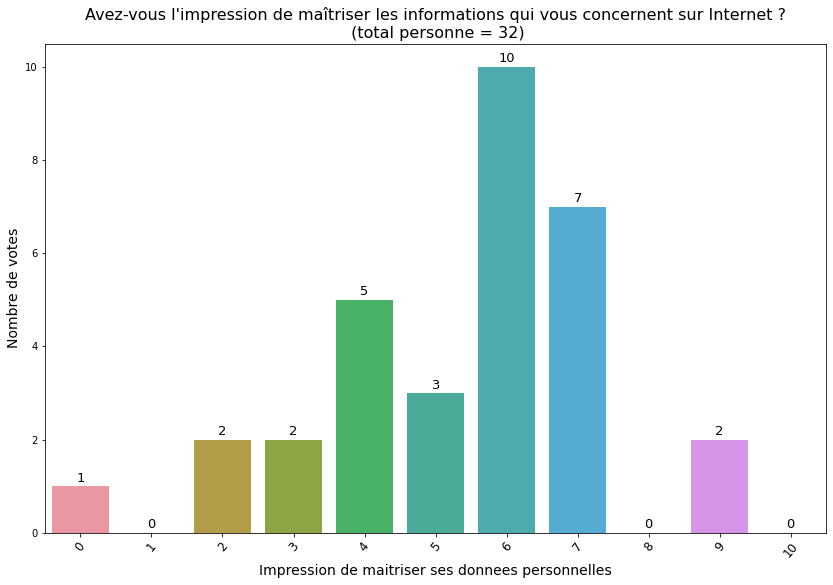

In [30]:
# Reference : https://www.geeksforgeeks.org/how-to-annotate-bars-in-barplot-with-matplotlib-in-python/
import pandas as pd
import seaborn as sns


nb_of_pips = []
moyenne_aisance = 0.0
total_notes = 0

for i in range(len(op_scale_c)) :
    df = form_responses[form_responses[q_confiance] == op_scale_c[i]]
    nb_votes = df.shape[0]
    nb_of_pips.append(nb_votes)
    total_notes += nb_votes*op_scale_c[i]

moyenne_aisance = total_notes / nb_responses

data = {"Note" : op_scale_c, "Votes" : nb_of_pips}

df = pd.DataFrame(data, columns=['Note', 'Votes'])

# Defining the plot size
plt.figure(figsize=(14, 9))
  
# Defining the values for x-axis, y-axis
# and from which datafarme the values are to be picked
plots = sns.barplot(x="Note", y="Votes", data=df)
  
# Iterrating over the bars one-by-one
for bar in plots.patches:

    plots.annotate(format(bar.get_height(), '.0f'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=bar_patchsize, xytext=(0, 8),
                   textcoords='offset points')
  
# Setting the label for x-axis
plt.xlabel("Impression de maitriser ses donnees personnelles", size=bar_axislabelsize)
  
# Setting the label for y-axis
plt.ylabel("Nombre de votes", size=bar_axislabelsize)
  
# Setting the title for the graph
plt.title(q_confiance + "\n (total personne = "+str(nb_responses)+')', size=bar_titlesize)

plt.xticks(rotation=50, size = bar_ticksize)
# Si je fais des plots de taux, ajouter echelle de 0 a 100
# plt.ylim([0,100])
  
# Fianlly showing the plot
plt.show()

In [31]:
print('Moyenne generale : '+str(moyenne_aisance))

Moyenne generale : 5.375


## TODO : Plotter sur un meme graph en fonction de l'age

## TODO : Plotter sur un meme graph en fonction du metier

## 2.F - Celles et ceux qui se sont donne.e.s plus de 7, parametrent-il.elle.s les cookies ? ( id = HapPLe0c3LtH ) // Single choice

Si quelqu'un pense maitriser ses donnees personnelles, il doit parametrer, au moins parfois, ses outils

In [32]:
# Get labels and results
q_cookiz, cookiz_lbls, ckz_lbls_dtfs = tfs.get_results(gidx=1,qid='HapPLe0c3LtH')

# Rappel des options :
print("Rappel des options possibles :\n ",cookiz_lbls)

Rappel des options possibles :
  ['Oui', 'Non', 'Parfois', "Qu'est-ce qu'un cookie numérique ?"]


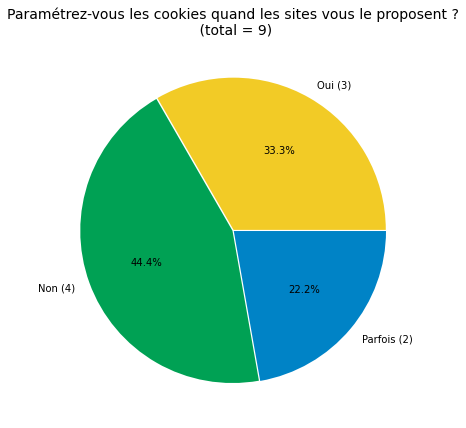

In [33]:
cln_cookiz_lbls, cln_ckz_values = mbr.clean_lists_for_cheesepie(labels=cookiz_lbls, values=ckz_lbls_dtfs)

nb_valid_resp = 0
for i in range(len(ckz_lbls_dtfs)) :
    nb_valid_resp += ckz_lbls_dtfs[i].shape[0]


#GRAPH SET UP
#------------
# Ajouter le nombre de respondants correspondant au label
for i in range(len(cln_cookiz_lbls)) :
    cln_cookiz_lbls[i] += ' ('+str(cln_ckz_values[i])+')'
    
# Set explode paramater based on favarite value
# Cree un tuple de la taille du nombre "clean" de labels de valeur egale a l'eclatement favoris
explode = (pie_fav_eclat,)*len(cln_cookiz_lbls)

# show plot
fig = plt.figure(figsize =(10, 7))
plt.pie(cln_ckz_values, labels = cln_cookiz_lbls, autopct='%1.1f%%', colors=myfavcolors, explode = explode)
plt.title(q_cookiz +'\n (total = '+ str(nb_valid_resp) +')', size = pie_titlesize)
plt.show()

## 2.G - Quantite de spams ? ( id = 4xciwhJq09rE ) // Opinion scale

In [34]:
qidq = '4xciwhJq09rE'
# Get labels and results
q_spams, spams_lbls, op_scale_s = tfs.get_results(gidx=1,qid=qidq)

# Rappel des options :
print("Taille de l'opinion :\n ",op_scale_s)

# form_responses = liste de toutes les reponses sous forme de dataframe

Taille de l'opinion :
  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


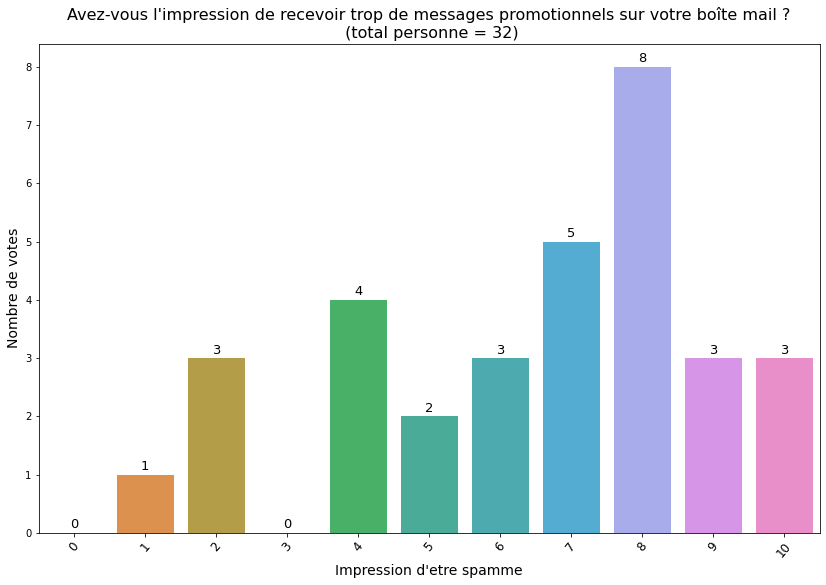

In [35]:
# Reference : https://www.geeksforgeeks.org/how-to-annotate-bars-in-barplot-with-matplotlib-in-python/
import pandas as pd
import seaborn as sns


nb_of_pips = []
moyenne_spams = 0.0
total_notes = 0

for i in range(len(op_scale_s)) :
    df = form_responses[form_responses[q_spams] == op_scale_s[i]]
    nb_votes = df.shape[0]
    nb_of_pips.append(nb_votes)
    total_notes += nb_votes*op_scale_c[i]

moyenne_spams = total_notes / nb_responses

data = {"Note" : op_scale_s, "Votes" : nb_of_pips}

df = pd.DataFrame(data, columns=['Note', 'Votes'])

# Defining the plot size
plt.figure(figsize=(14, 9))
  
# Defining the values for x-axis, y-axis
# and from which datafarme the values are to be picked
plots = sns.barplot(x="Note", y="Votes", data=df)
  
# Iterrating over the bars one-by-one
for bar in plots.patches:

    plots.annotate(format(bar.get_height(), '.0f'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=bar_patchsize, xytext=(0, 8),
                   textcoords='offset points')
  
# Setting the label for x-axis
plt.xlabel("Impression d'etre spamme", size=bar_axislabelsize)
  
# Setting the label for y-axis
plt.ylabel("Nombre de votes", size=bar_axislabelsize)
  
# Setting the title for the graph
plt.title(q_spams + "\n (total personne = "+str(nb_responses)+')', size = bar_titlesize)

plt.xticks(rotation=50, size = bar_ticksize)
# Si je fais des plots de taux, ajouter echelle de 0 a 100
# plt.ylim([0,100])
  
# Fianlly showing the plot
plt.show()

In [36]:
print("Moyenne impression d'etre spamme : " + str(moyenne_spams))

Moyenne impression d'etre spamme : 6.46875


## 2.H - Gestion des mots de passe ? ( id = ZkMwKgLi3nvp ) // Single Choice

In [37]:
q_id = 'ZkMwKgLi3nvp'

# Get labels and results
q_gestMDP, l_gestMDP_lbl, l_gestMDP_dtfs = tfs.get_results(gidx=1,qid=q_id)

# Rappel des options :
print("Rappel des options possibles :\n ",l_gestMDP_lbl)

POOOOO
Rappel des options possibles :
  ['Papiers, post-it. Car eux, ils ne se font pas hacker', "Je les enregistre dans mon navigateur, comme ca je vis l'experience la plus fluide possible", "J'ai un gestionnaire de mots de passe dédié. Tout est crypté", 'Other.1']


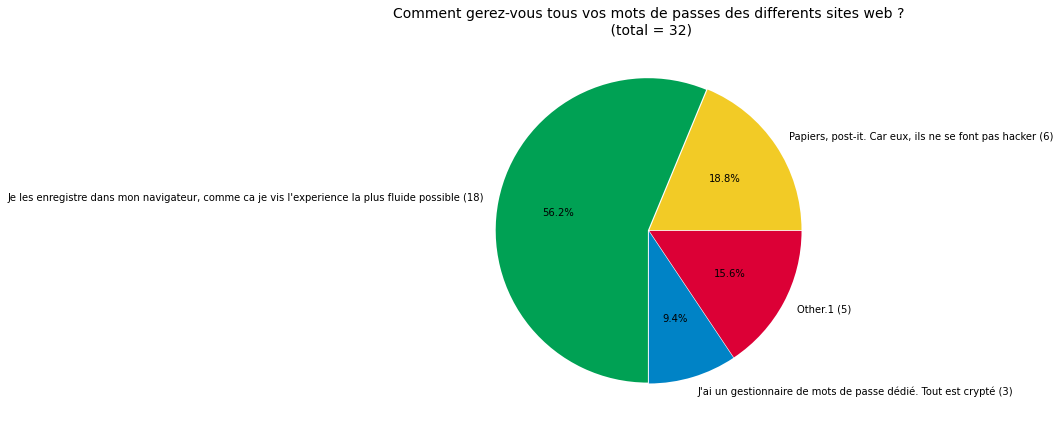

In [38]:
cln_gestMDP_lbl, cln_gestMDP_votes = mbr.clean_lists_for_cheesepie(labels=l_gestMDP_lbl, values=l_gestMDP_dtfs)

nb_valid_resp = 0
for i in range(len(l_gestMDP_dtfs)) :
    nb_valid_resp += l_gestMDP_dtfs[i].shape[0]


#GRAPH SET UP
#------------
# Ajouter le nombre de respondants correspondant au label
for i in range(len(cln_gestMDP_lbl)) :
    cln_gestMDP_lbl[i] += ' ('+str(cln_gestMDP_votes[i])+')'
    
# Set explode paramater based on favarite value
# Cree un tuple de la taille du nombre "clean" de labels de valeur egale a l'eclatement favoris
explode = (pie_fav_eclat,)*len(cln_gestMDP_lbl)

# show plot
fig = plt.figure(figsize =(10, 7))
plt.pie(cln_gestMDP_votes, labels = cln_gestMDP_lbl, autopct='%1.1f%%', colors=myfavcolors, explode = explode)
plt.title(q_gestMDP +'\n (total = '+ str(nb_valid_resp) +')', size = pie_titlesize)
plt.show()

## TODO : Remonter quelques 'other'

## 2.I - Benediction ou Malediction ? ( id = rT2VhptKefBR ) // Single Choice

In [39]:
q_id = 'rT2VhptKefBR'

# Get labels and results
q_bene, l_bene_lbl, l_bene_dtfs = tfs.get_results(gidx=1,qid=q_id)

# Rappel des options :
print("Rappel des options possibles :\n ",l_bene_lbl)

Rappel des options possibles :
  ['Bénédiction', 'Malédiction', 'Drôle de question']


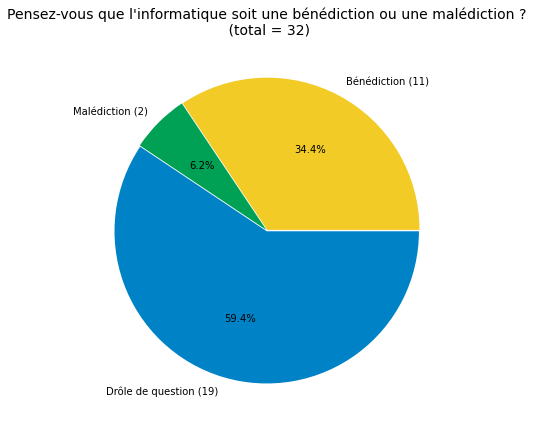

In [40]:
cln_bene_lbl, cln_bene_notes = mbr.clean_lists_for_cheesepie(labels=l_bene_lbl, values=l_bene_dtfs)

nb_valid_resp = 0
for i in range(len(l_bene_dtfs)) :
    nb_valid_resp += l_bene_dtfs[i].shape[0]


#GRAPH SET UP
#------------
# Ajouter le nombre de respondants correspondant au label
for i in range(len(cln_bene_lbl)) :
    cln_bene_lbl[i] += ' ('+str(cln_bene_notes[i])+')'
    
# Set explode paramater based on favarite value
# Cree un tuple de la taille du nombre "clean" de labels de valeur egale a l'eclatement favoris
explode = (pie_fav_eclat,)*len(cln_cookiz_lbls)

# show plot
fig = plt.figure(figsize =(10, 7))
plt.pie(cln_bene_notes, labels = cln_bene_lbl, autopct='%1.1f%%', colors=myfavcolors, explode = explode)
plt.title(q_bene +'\n (total = '+ str(nb_valid_resp) +')', size = pie_titlesize)
plt.show()

## TODO voir quelle est la note moyenne de ceux qui kiffent

--------------------------------------------------------

# GROUP 3 - ENSEIGNEMENT ET EDUCATION

--------------------------------------------------------

## 3.A - Vous a-t-on enseigne l'informatique a l'ecole ? ( id = NXnMNhHW9dGK ) // Single Choice

In [41]:
q_id = 'NXnMNhHW9dGK'

# Get labels and results
q_apprentissage, l_apprentissage_lbl, l_apprentissage_dtfs = tfs.get_results(gidx=2,qid=q_id)

# Rappel des options :
print("Rappel des options possibles :\n ",l_apprentissage_lbl)

Rappel des options possibles :
  ['oui', 'non']


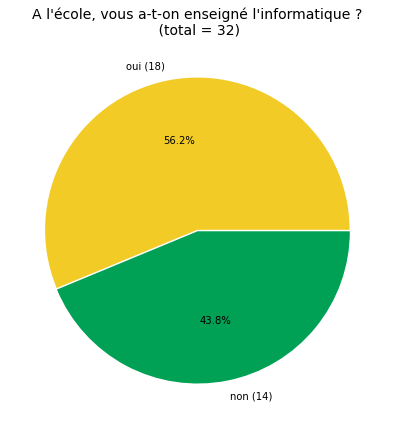

In [42]:
cln_apprentissage_lbl, cln_apprentissage_votes = mbr.clean_lists_for_cheesepie(labels=l_apprentissage_lbl, values=l_apprentissage_dtfs)

nb_valid_resp = 0
for i in range(len(l_apprentissage_dtfs)) :
    nb_valid_resp += l_apprentissage_dtfs[i].shape[0]


#GRAPH SET UP
#------------
# Ajouter le nombre de respondants correspondant au label
for i in range(len(cln_apprentissage_lbl)) :
    cln_apprentissage_lbl[i] += ' ('+str(cln_apprentissage_votes[i])+')'
    
# Set explode paramater based on favarite value
# Cree un tuple de la taille du nombre "clean" de labels de valeur egale a l'eclatement favoris
explode = (pie_fav_eclat,)*len(cln_apprentissage_lbl)

# show plot
fig = plt.figure(figsize =(10, 7))
plt.pie(cln_apprentissage_votes, labels = cln_apprentissage_lbl, autopct='%1.1f%%', colors=myfavcolors, explode = explode)
plt.title(q_apprentissage +'\n (total = '+ str(nb_valid_resp) +')', size = pie_titlesize)
plt.show()

## TODO : Faire par tranche d'age

## TODO : Faire par sexe

## TODO : Combien de terminaux possedent ceux qui n'ont pas appris a l'ecole ?

## TODO : Quel est leur niveau d'aisance

## 3.B - Si Oui : A quelle periode ? ( id = evUI2CmdoK14 ) // Multiple Choice

In [43]:
qidq = 'evUI2CmdoK14'
# Get labels and results
q_timetolearn, timetolearn_lbls, timetolearn_dtf = tfs.get_results(gidx=2,qid=qidq)

# Rappel des options :
print("Rappel des options possibles :\n ",timetolearn_lbls)

Rappel des options possibles :
  ['École primaire', 'Collège', 'Lycée', 'Études supérieures', 'Other.2']


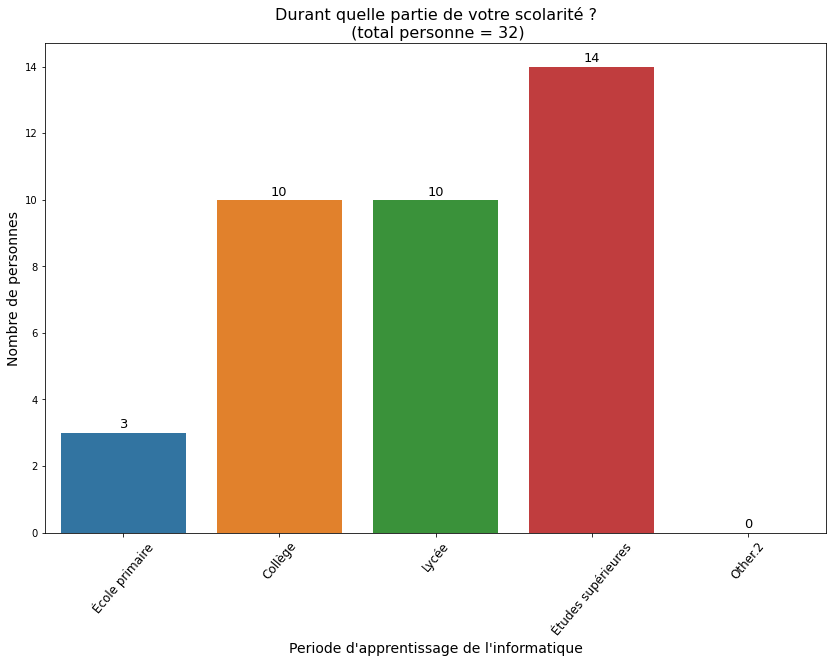

In [44]:
# Reference : https://www.geeksforgeeks.org/how-to-annotate-bars-in-barplot-with-matplotlib-in-python/
import pandas as pd
import seaborn as sns


nb_of_pips = []
moyenne_aisance = 0.0

for i in range(len(timetolearn_lbls)) :
    nb_votes = timetolearn_dtf[i].shape[0]
    nb_of_pips.append(nb_votes)

data = {"Enseignement informatique" : timetolearn_lbls, "Nb personnes" : nb_of_pips}

df = pd.DataFrame(data, columns=['Enseignement informatique', 'Nb personnes'])

# Defining the plot size
plt.figure(figsize=(14, 9))
  
# Defining the values for x-axis, y-axis
# and from which datafarme the values are to be picked
plots = sns.barplot(x="Enseignement informatique", y="Nb personnes", data=df)
  
# Iterrating over the bars one-by-one
for bar in plots.patches:

    plots.annotate(format(bar.get_height(), '.0f'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=bar_patchsize, xytext=(0, 8),
                   textcoords='offset points')
  
# Setting the label for x-axis
plt.xlabel("Periode d'apprentissage de l'informatique", size=bar_axislabelsize)
  
# Setting the label for y-axis
plt.ylabel("Nombre de personnes", size=bar_axislabelsize)
  
# Setting the title for the graph
plt.title(q_timetolearn + "\n (total personne = "+str(nb_responses)+')', size = bar_titlesize)

plt.xticks(rotation=50, size = bar_ticksize)
# Si je fais des plots de taux, ajouter echelle de 0 a 100
# plt.ylim([0,100])
  
# Fianlly showing the plot
plt.show()

## 3.C - Formation professionnelle ? ( id = hENgGmnFSnpK ) // Yes/no


In [45]:
qidq = 'hENgGmnFSnpK'
# Get labels and results
q_formpro, formpro_lbls, formpro_dtf = tfs.get_results(gidx=2,qid=qidq)

# Rappel des options :
print("Rappel des options possibles :\n ",formpro_lbls)

Rappel des options possibles :
  ['oui', 'non']


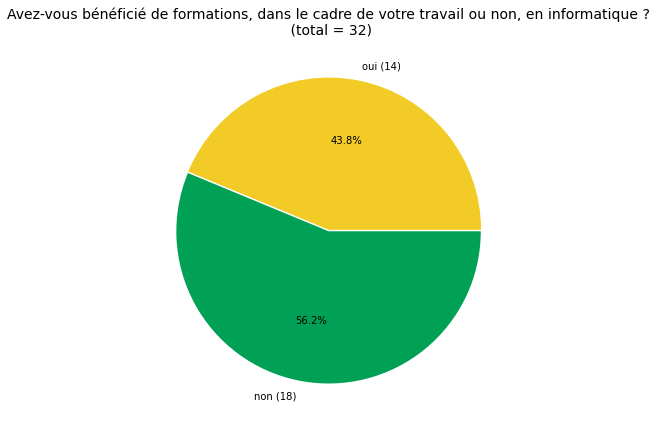

In [46]:
cln_formpro_lbl, cln_formpro_votes = mbr.clean_lists_for_cheesepie(labels=formpro_lbls, values=formpro_dtf)

nb_valid_resp = 0
for i in range(len(formpro_dtf)) :
    nb_valid_resp += formpro_dtf[i].shape[0]


#GRAPH SET UP
#------------
# Ajouter le nombre de respondants correspondant au label
for i in range(len(cln_formpro_lbl)) :
    cln_formpro_lbl[i] += ' ('+str(cln_formpro_votes[i])+')'
    
# Set explode paramater based on favarite value
# Cree un tuple de la taille du nombre "clean" de labels de valeur egale a l'eclatement favoris
explode = (pie_fav_eclat,)*len(cln_formpro_lbl)

# show plot
fig = plt.figure(figsize =(10, 7))
plt.pie(cln_formpro_votes, labels = cln_formpro_lbl, autopct='%1.1f%%', colors=myfavcolors, explode = explode)
plt.title(q_formpro +'\n (total = '+ str(nb_valid_resp) +')', size = pie_titlesize)
plt.show()

## 3.D - Saver-vous ecrire en binaire ? ( id = TtSJ6Qnx4pQF ) // Yes/No

In [47]:
qidq = 'TtSJ6Qnx4pQF'
# Get labels and results
q_knobinary, knobinary_lbls, knobinary_dtf = tfs.get_results(gidx=2,qid=qidq)

# Rappel des options :
print("Rappel des options possibles :\n ",knobinary_lbls)

Rappel des options possibles :
  ['oui', 'non']


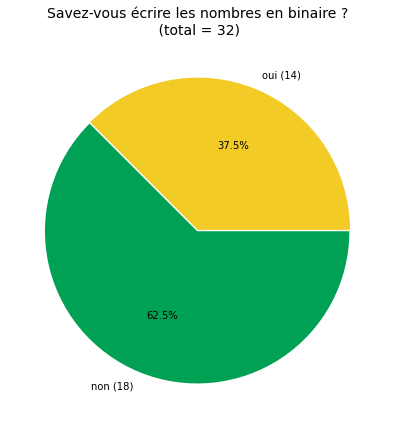

In [48]:
cln_knobinary_lbl, cln_knobinary_notes = mbr.clean_lists_for_cheesepie(labels=knobinary_lbls, values=knobinary_dtf)

nb_valid_resp = 0
for i in range(len(knobinary_dtf)) :
    nb_valid_resp += knobinary_dtf[i].shape[0]


#GRAPH SET UP
#------------
# Ajouter le nombre de respondants correspondant au label
for i in range(len(cln_knobinary_lbl)) :
    cln_knobinary_lbl[i] += ' ('+str(cln_formpro_votes[i])+')'
    
# Set explode paramater based on favarite value
# Cree un tuple de la taille du nombre "clean" de labels de valeur egale a l'eclatement favoris
explode = (pie_fav_eclat,)*len(cln_knobinary_lbl)

# show plot
fig = plt.figure(figsize =(10, 7))
plt.pie(cln_knobinary_notes, labels = cln_knobinary_lbl, autopct='%1.1f%%', colors=myfavcolors, explode = explode)
plt.title(q_knobinary +'\n (total = '+ str(nb_valid_resp) +')', size = pie_titlesize)
plt.show()

## 3.E - Si oui : Test de binaire ( 0101 ? id = 50aXmk8eOhtZ ) // Champ nombre

In [49]:
qidq = '50aXmk8eOhtZ'
resultatattendu = 5

nom_question = tfs.get_q_title(gidx=2,qid=qidq)
print(nom_question)
nb_sachant_binaire = knobinary_dtf[0].shape[0]
# print('total personnes interrogees : ' + str(nb_sachant_binaire) )
dtf_des_vrais_binaires_mans = knobinary_dtf[0][knobinary_dtf[0][nom_question] == resultatattendu]
# print ('Resultat attendu : '+str(resultatattendu))
nb_vrais_binaire_man = dtf_des_vrais_binaires_mans.shape[0]
# print ('Nombre de vrais binaires mans : '+ str(nb_vrais_binaire_man))

Et bien prouvez le ! Que vaut 0101 ?


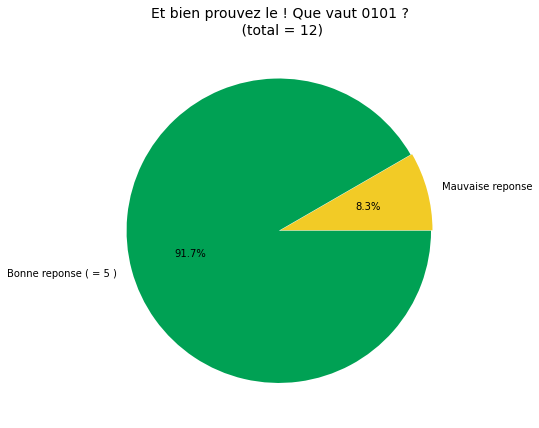

In [50]:
labels = ['Mauvaise reponse' , 'Bonne reponse ( = 5 )']
values = [nb_sachant_binaire - nb_vrais_binaire_man, nb_vrais_binaire_man]

# show plot
explode = (pie_fav_eclat,)*2

fig = plt.figure(figsize =(10, 7))
plt.pie(values, labels = labels, autopct='%1.1f%%', colors=myfavcolors, explode = explode) #, colors=mecolors
plt.title(nom_question + "\n (total = "+str(nb_sachant_binaire)+")", size = pie_titlesize)
plt.show()

## 3.F - Si non : Interesse pour apprendre ? ( id = Sj58NG9HjORn ) // Yes/No

In [51]:
qidq = 'Sj58NG9HjORn'
# On aimerait bien que les gens soient interesses pour apprendre
resultatattendu = 1

nom_question = tfs.get_q_title(gidx=2,qid=qidq)

# print(nom_question)
nb_non_sachant_binaire = knobinary_dtf[1].shape[0]
# print('total personnes interrogees : ' + str(nb_non_sachant_binaire) )
dtf_interetbinaire_mans = knobinary_dtf[1][knobinary_dtf[1][nom_question] == resultatattendu]
# print ('Resultat attendu : '+str(resultatattendu))
nb_interesses = dtf_interetbinaire_mans.shape[0]
# print ('Nombre de vrais binaires mans : '+ str(nb_interesses))

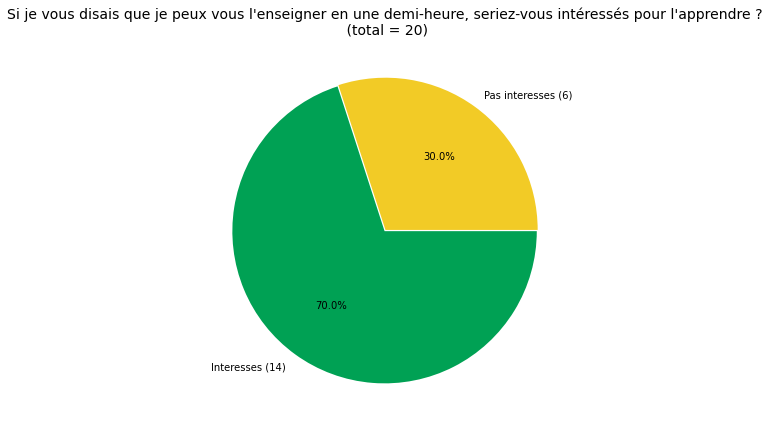

In [52]:
labels = ['Pas interesses (' +str(nb_non_sachant_binaire - nb_interesses) +')', 'Interesses (' + str(nb_interesses) + ')']
values = [nb_non_sachant_binaire - nb_interesses, nb_interesses]

# show plot
explode = (pie_fav_eclat,)*2

fig = plt.figure(figsize =(10, 7))
plt.pie(values, labels = labels, autopct='%1.1f%%', colors=myfavcolors, explode = explode)
plt.title(nom_question + "\n (total = "+str(nb_non_sachant_binaire)+")", size = pie_titlesize)
plt.show()

## 3.G - Seriez-vous pret a payer ? ( id = FrOxlYq8Jwsu ) // Yes/No

In [53]:
groupidx = 2
qidq = 'FrOxlYq8Jwsu'
# On aimerait bien que les gens soient interesses pour apprendre
resultatattendu = 1

#nom_question = tfs.get_q_title(gidx=2,qid=qidq)

#print(nom_question)
nb_non_sachant_binaire = knobinary_dtf[1].shape[0]
print('total personnes interrogees : ' + str(nb_non_sachant_binaire) )


# Get labels and results
# intulie d'utiliser ici le get sub question, mais c'etait pour tester
q_wannapay, wannapay_lbls, wannapay_dtf = tfs.get_sub_question_specific_dtf(gidx=groupidx,qid=qidq, inputdtf = knobinary_dtf[1])

total personnes interrogees : 20


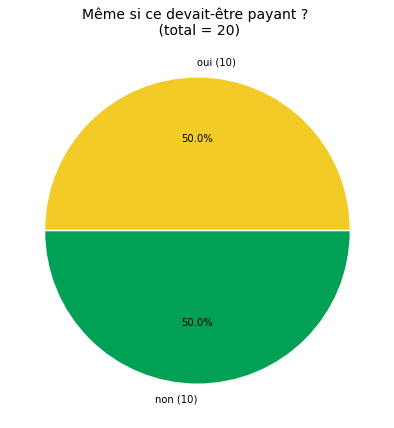

In [54]:
cln_wannapay_lbl, cln_wannapay_votes = mbr.clean_lists_for_cheesepie(labels=wannapay_lbls, values=wannapay_dtf)

nb_valid_resp = 0
for i in range(len(wannapay_dtf)) :
    nb_valid_resp += wannapay_dtf[i].shape[0]


#GRAPH SET UP
#------------
# Ajouter le nombre de respondants correspondant au label
for i in range(len(cln_wannapay_lbl)) :
    cln_wannapay_lbl[i] += ' ('+str(cln_wannapay_votes[i])+')'
    
# Set explode paramater based on favarite value
# Cree un tuple de la taille du nombre "clean" de labels de valeur egale a l'eclatement favoris
explode = (pie_fav_eclat,)*len(cln_wannapay_lbl)

# show plot
fig = plt.figure(figsize =(10, 7))
plt.pie(cln_wannapay_votes, labels = cln_wannapay_lbl, autopct='%1.1f%%', colors=myfavcolors, explode = explode)
plt.title(q_wannapay +'\n (total = '+ str(nb_valid_resp) +')', size = pie_titlesize)
plt.show()

## 3.H - Combien seriez-vous pret a payer ? ( id = v2XKUtC6wDIT ) // single choice

In [55]:
groupidx = 2
qidq = 'v2XKUtC6wDIT'


# Get labels and results
# intulie d'utiliser ici le get sub question, mais c'etait pour tester
q_howmuch, howmuch_lbls, howmuch_dtf = tfs.get_results(gidx=groupidx, qid=qidq)

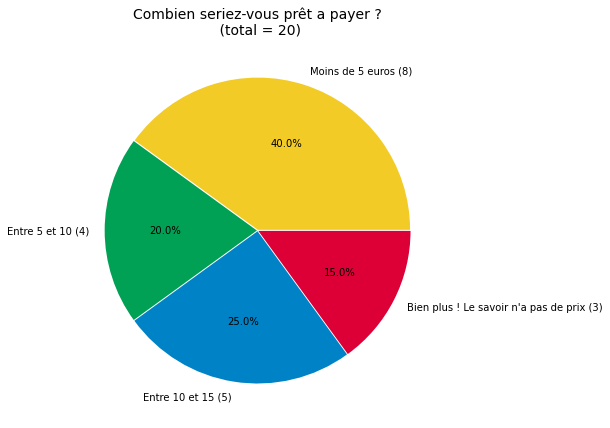

In [56]:
cln_howmuch_lbl, cln_howmuch_votes = mbr.clean_lists_for_cheesepie(labels=howmuch_lbls, values=howmuch_dtf)


nb_valid_resp = 0
for i in range(len(howmuch_dtf)) :
    nb_valid_resp += howmuch_dtf[i].shape[0]


#GRAPH SET UP
#------------
# Ajouter le nombre de respondants correspondant au label
for i in range(len(cln_howmuch_lbl)) :
    cln_howmuch_lbl[i] += ' ('+str(cln_howmuch_votes[i])+')'
    
# Set explode paramater based on favarite value
# Cree un tuple de la taille du nombre "clean" de labels de valeur egale a l'eclatement favoris
explode = (pie_fav_eclat,)*len(cln_howmuch_lbl)

# show plot
fig = plt.figure(figsize =(10, 7))
plt.pie(cln_howmuch_votes, labels = cln_howmuch_lbl, autopct='%1.1f%%', colors=myfavcolors, explode = explode)
plt.title(q_howmuch +'\n (total = '+ str(nb_valid_resp) +')', size = pie_titlesize)
plt.show()

## TO DO  : Ne prendre que ceux qui sont pret a payer

## 3.I - What is an algorithm ? ( id = wgAdSVuU7RBX ) // single choice

In [57]:
groupidx = 2
qidq = 'wgAdSVuU7RBX'


# Get labels and results
# intulie d'utiliser ici le get sub question, mais c'etait pour tester
q_whatisalgo, whatisalgo_lbls, whatisalgo_dtf = tfs.get_results(gidx=groupidx, qid=qidq)

# Rappel des options :
print("Rappel des reponses possibles :\n ",whatisalgo_lbls)

Rappel des reponses possibles :
  ['Aucune idee', 'Une instruction pour un ordinateur', "Une serie d'etapes reproductible pour parvenir a un resultat"]


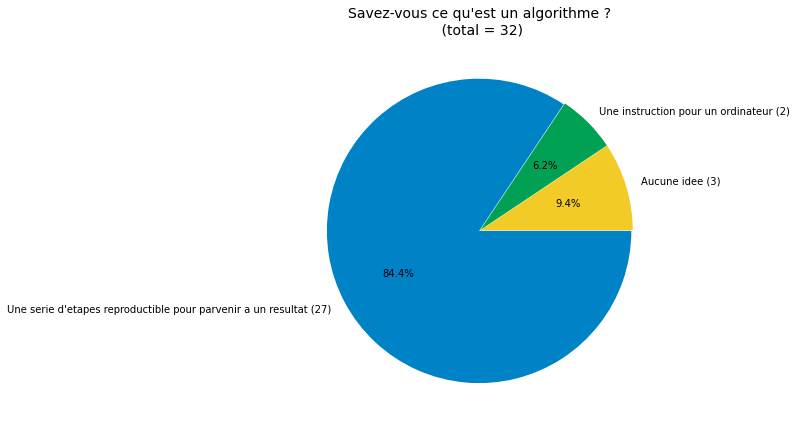

In [58]:
cln_whatisalgo_lbl, cln_whatisalgo_votes = mbr.clean_lists_for_cheesepie(labels=whatisalgo_lbls, values=whatisalgo_dtf)


nb_valid_resp = 0
for i in range(len(whatisalgo_dtf)) :
    nb_valid_resp += whatisalgo_dtf[i].shape[0]


#GRAPH SET UP
#------------
# Ajouter le nombre de respondants correspondant au label
for i in range(len(cln_whatisalgo_lbl)) :
    cln_whatisalgo_lbl[i] += ' ('+str(cln_whatisalgo_votes[i])+')'
    
# Set explode paramater based on favarite value
# Cree un tuple de la taille du nombre "clean" de labels de valeur egale a l'eclatement favoris
explode = (pie_fav_eclat,)*len(cln_whatisalgo_lbl)

# show plot
fig = plt.figure(figsize =(10, 7))
plt.pie(cln_whatisalgo_votes, labels = cln_whatisalgo_lbl, autopct='%1.1f%%', colors=myfavcolors, explode = explode)
plt.title(q_whatisalgo +'\n (total = '+ str(nb_valid_resp) +')', size = pie_titlesize)
plt.show()

## 3.J Pensez-vous qu'il est important d'apprendre l'informatique a l'ecole ? ( id = I789HlZQYdNO ) // Yes No

In [59]:
groupidx = 2
qidq = 'I789HlZQYdNO'


# Get labels and results
# intulie d'utiliser ici le get sub question, mais c'etait pour tester
q_italecole, italecole_lbls, italecole_dtf = tfs.get_results(gidx=groupidx, qid=qidq)

# Rappel des options :
print("Rappel des reponses possibles :\n ",italecole_lbls)

Rappel des reponses possibles :
  ['oui', 'non']


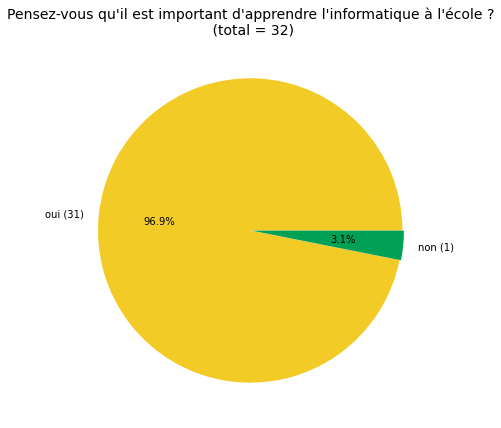

In [60]:
cln_italecole_lbl, cln_italecole_votes = mbr.clean_lists_for_cheesepie(labels=italecole_lbls, values=italecole_dtf)

nb_valid_resp = 0
for i in range(len(italecole_dtf)) :
    nb_valid_resp += italecole_dtf[i].shape[0]


#GRAPH SET UP
#------------
# Ajouter le nombre de respondants correspondant au label
for i in range(len(cln_italecole_lbl)) :
    cln_italecole_lbl[i] += ' ('+str(cln_italecole_votes[i])+')'
    
# Set explode paramater based on favarite value
# Cree un tuple de la taille du nombre "clean" de labels de valeur egale a l'eclatement favoris
explode = (pie_fav_eclat,)*len(cln_italecole_lbl)

# show plot
fig = plt.figure(figsize =(10, 7))
plt.pie(cln_italecole_votes, labels = cln_italecole_lbl, autopct='%1.1f%%', colors=myfavcolors, explode = explode)
plt.title(q_italecole +'\n (total = '+ str(nb_valid_resp) +')', size = pie_titlesize)
plt.show()

## 3.L - A partie de quel age pensez vous qu'on peut l'apprendre ? ( id =  Fr1Ipxc0yrTU ) // Number 

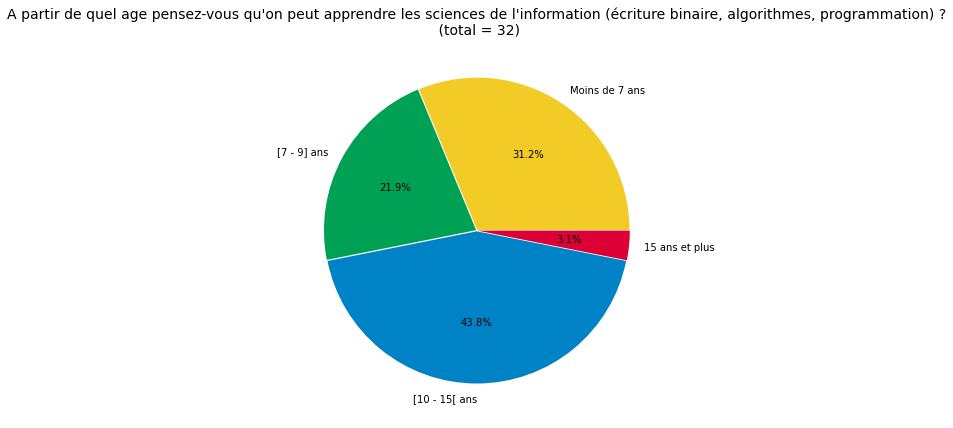

In [61]:
qidq = 'Fr1Ipxc0yrTU'

nom_question = tfs.get_q_title(gidx=2,qid=qidq)

nb_inferieur_a_7 = form_responses[form_responses[nom_question] < 7]
nb_7_9 = form_responses[form_responses[nom_question] >= 7]
nb_7_9 = nb_7_9[nb_7_9[nom_question] < 10]
nb_10_14 = form_responses[form_responses[nom_question] >= 10]
nb_10_14 = nb_10_14[nb_10_14[nom_question] < 15]
nb_15_et_plus = form_responses[form_responses[nom_question] >= 15]

labels = ['Moins de 7 ans', '[7 - 9] ans', '[10 - 15[ ans', '15 ans et plus']
values = [nb_inferieur_a_7.shape[0], nb_7_9.shape[0], nb_10_14.shape[0], nb_15_et_plus.shape[0]]

# show plot
explode = (pie_fav_eclat,)*len(labels)
fig = plt.figure(figsize =(10, 7))
plt.pie(values, labels = labels, autopct='%1.1f%%', colors=myfavcolors, explode = explode) #, colors=mecolors
plt.title(nom_question + "\n (total = "+str(form_responses.shape[0])+")", size = pie_titlesize)
plt.show()

## 3.M - Que faites-vous quand vous avez un Pbl d'IT ? ( id = LnMLflXPfnmF ) // single choice

In [62]:
groupidx = 2
qidq = 'LnMLflXPfnmF'


# Get labels and results
# intulie d'utiliser ici le get sub question, mais c'etait pour tester
q_pblIT, pblIT_lbls, pblIT_dtf = tfs.get_results(gidx=groupidx, qid=qidq)

# Rappel des options :
print("Rappel des reponses possibles :\n ",pblIT_lbls)

Rappel des reponses possibles :
  ['Recherchez sur Internet et cliquez sur les premiers liens qui vous sont retournés', 'Recherchez sur Internet et cliquez sur les sites que vous connaissez bien', 'Demandez à un proche plus expérimenté de vous aider', "Restez bloqués jusqu'à ce que la Providence vous apporte une éventuelle solution"]


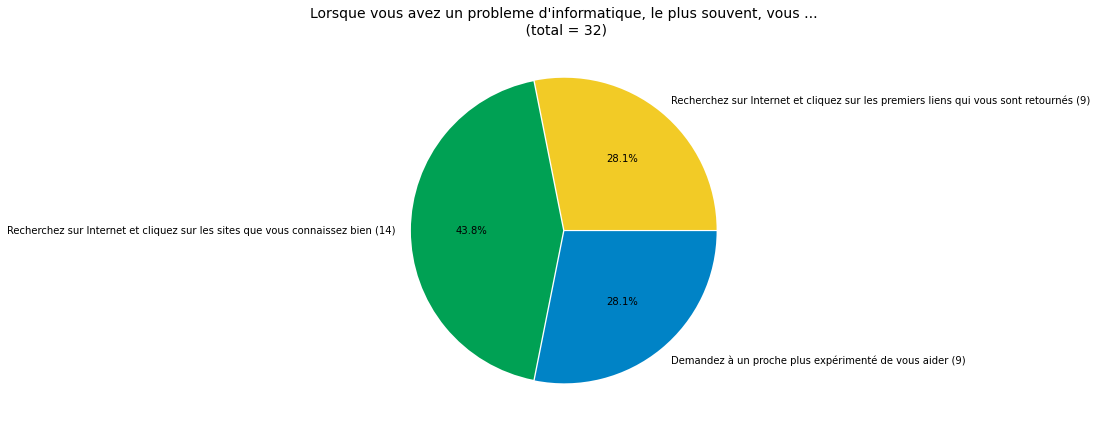

In [63]:
cln_pblIT_lbl, cln_pblIT_dtfs = mbr.clean_lists_for_cheesepie(labels=pblIT_lbls, values=pblIT_dtf)

nb_valid_resp = 0
for i in range(len(pblIT_dtf)) :
    nb_valid_resp += pblIT_dtf[i].shape[0]


#GRAPH SET UP
#------------
# Ajouter le nombre de respondants correspondant au label
for i in range(len(cln_pblIT_lbl)) :
    cln_pblIT_lbl[i] += ' ('+str(cln_pblIT_dtfs[i])+')'
    
# Set explode paramater based on favarite value
# Cree un tuple de la taille du nombre "clean" de labels de valeur egale a l'eclatement favoris
explode = (pie_fav_eclat,)*len(cln_pblIT_lbl)

# show plot
fig = plt.figure(figsize =(10, 7))
plt.pie(cln_pblIT_dtfs, labels = cln_pblIT_lbl, autopct='%1.1f%%', colors=myfavcolors, explode = explode)
plt.title(q_pblIT +'\n (total = '+ str(nb_valid_resp) +')', size = pie_titlesize)
plt.show()

-------------------------------------------------------------------------

# GROUP 4 : L'Offre culturelle numerique

-------------------------------------------------------------------------

## 4.A - Comment vous tenez-vous informes de l'actualite culturelle ? ( id = vyi1RKqR6x75 ) // Multiple Choice

In [64]:
groupidx = 3
qidq = 'vyi1RKqR6x75'


# Get labels and results
# intulie d'utiliser ici le get sub question, mais c'etait pour tester
q_newsculture, newsculture_lbls, newsculture_dtf = tfs.get_results(gidx=groupidx, qid=qidq)

# Rappel des options :
print("Rappel des reponses possibles :\n ",newsculture_lbls)

Rappel des reponses possibles :
  ['Par des abonnements bien sentis sur les reseaux sociaux', 'En allant sur les sites des musées ou de leurs partenaires', 'Grâce à la télévision, la radio, les journaux ou les media web', 'Grâce au bouche à oreille', 'Je ne recherche pas activement de l’information sur ce sujet']


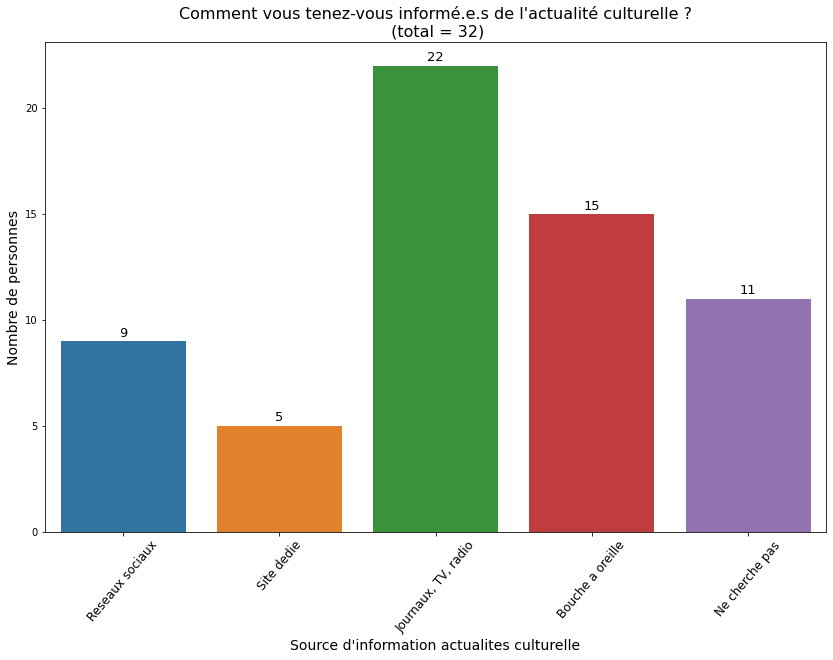

In [65]:
# Reference : https://www.geeksforgeeks.org/how-to-annotate-bars-in-barplot-with-matplotlib-in-python/
import pandas as pd
import seaborn as sns


nb_of_pips = []

for i in range(len(newsculture_lbls)) :
    nb_votes = newsculture_dtf[i].shape[0]
    nb_of_pips.append(nb_votes)

# Je raccourcis les labels pour l'affichage
newsculture_lbls = ['Reseaux sociaux', 'Site dedie', 'Journaux, TV, radio', 'Bouche a oreille', 'Ne cherche pas']

data = {"SourcesCulturelles" : newsculture_lbls, "Nbpersonnes" : nb_of_pips}

df = pd.DataFrame(data, columns=['SourcesCulturelles', 'Nbpersonnes'])

# Defining the plot size
plt.figure(figsize=(14, 9))
  
# Defining the values for x-axis, y-axis
# and from which datafarme the values are to be picked
plots = sns.barplot(x="SourcesCulturelles", y="Nbpersonnes", data=df)
  
# Iterrating over the bars one-by-one
for bar in plots.patches:

    plots.annotate(format(bar.get_height(), '.0f'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=bar_patchsize, xytext=(0, 8),
                   textcoords='offset points')
  
# Setting the label for x-axis
plt.xlabel("Source d'information actualites culturelle", size=bar_axislabelsize)
  
# Setting the label for y-axis
plt.ylabel("Nombre de personnes", size=bar_axislabelsize)
  
# Setting the title for the graph
plt.title(q_newsculture + "\n (total = "+str(nb_responses)+')', size = bar_titlesize)

plt.xticks(rotation=50, size = bar_ticksize)
# Si je fais des plots de taux, ajouter echelle de 0 a 100
# plt.ylim([0,100])
  
# Fianlly showing the plot
plt.show()

## 4.B - Avez-vous eu l'occasion de voir une des tops videos cultures 2020 ? ( id = SfiZNZEpZLSi ) // Single Choice

In [66]:

groupidx = 3
qidq = 'SfiZNZEpZLSi'


# Get labels and results
# intulie d'utiliser ici le get sub question, mais c'etait pour tester
q_vidcul_2020, vidcul_2020_lbls, vidcul_2020_dtf = tfs.get_results(gidx=groupidx, qid=qidq)

# Rappel des options :
print("Rappel des reponses possibles :\n ",vidcul_2020_lbls)

Rappel des reponses possibles :
  ['Oui', 'Non', 'Peut-etre']


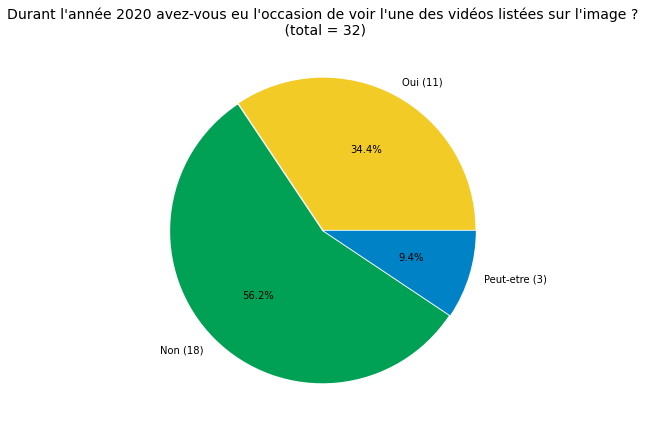

In [67]:
cln_vidcul_2020_lbl, cln_vidcul_2020_votes = mbr.clean_lists_for_cheesepie(labels=vidcul_2020_lbls, values=vidcul_2020_dtf)

# Juste parce que parfois certains enregistrements chient 
nb_valid_resp = 0
for i in range(len(vidcul_2020_dtf)) :
    nb_valid_resp += vidcul_2020_dtf[i].shape[0]


#GRAPH SET UP
#------------
# Ajouter le nombre de respondants correspondant au label
for i in range(len(cln_vidcul_2020_lbl)) :
    cln_vidcul_2020_lbl[i] += ' ('+str(cln_vidcul_2020_votes[i])+')'
    
# Set explode paramater based on favarite value
# Cree un tuple de la taille du nombre "clean" de labels de valeur egale a l'eclatement favoris
explode = (pie_fav_eclat,)*len(cln_vidcul_2020_lbl)

# show plot
fig = plt.figure(figsize =(10, 7))
plt.pie(cln_vidcul_2020_votes, labels = cln_vidcul_2020_lbl, autopct='%1.1f%%', colors=myfavcolors, explode = explode)
plt.title(q_vidcul_2020 +'\n (total = '+ str(nb_valid_resp) +')', size = pie_titlesize)
plt.show()

## 4.C - Si non, pensez-vous en regarder-une ? ( id = m3cIyvOrSQgC ) // single choice 

In [68]:
groupidx = 3
qidq = 'm3cIyvOrSQgC'


# Get labels and results
# intulie d'utiliser ici le get sub question, mais c'etait pour tester
q_wanna_watch_video_cul, wanna_watch_video_cul_lbls, wanna_watch_video_cul_dtf = tfs.get_results(gidx=groupidx, qid=qidq)

# Rappel des options :
print("Rappel des reponses possibles :\n ",wanna_watch_video_cul_lbls)

Rappel des reponses possibles :
  ['Oui', 'Non', 'On verra', "J'en ai regardé !"]


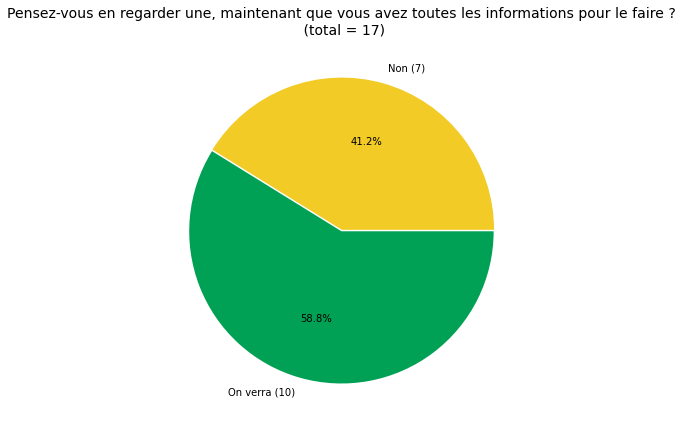

In [69]:
cln_wanna_watch_video_cul_lbl, cln_wanna_watch_video_cul_votes = mbr.clean_lists_for_cheesepie(labels=wanna_watch_video_cul_lbls, values=wanna_watch_video_cul_dtf)

# Juste parce que parfois certains enregistrements chient 
nb_valid_resp = 0
for i in range(len(wanna_watch_video_cul_dtf)) :
    nb_valid_resp += wanna_watch_video_cul_dtf[i].shape[0]

#GRAPH SET UP
#------------
# Ajouter le nombre de respondants correspondant au label
for i in range(len(cln_wanna_watch_video_cul_lbl)) :
    cln_wanna_watch_video_cul_lbl[i] += ' ('+str(cln_wanna_watch_video_cul_votes[i])+')'
    
# Set explode paramater based on favarite value
# Cree un tuple de la taille du nombre "clean" de labels de valeur egale a l'eclatement favoris
explode = (pie_fav_eclat,)*len(cln_wanna_watch_video_cul_lbl)

# show plot
fig = plt.figure(figsize =(10, 7))
plt.pie(cln_wanna_watch_video_cul_votes, labels = cln_wanna_watch_video_cul_lbl, autopct='%1.1f%%', colors=myfavcolors, explode = explode)
plt.title(q_wanna_watch_video_cul +'\n (total = '+ str(nb_valid_resp) +')', size = pie_titlesize)
plt.show()

## 4.D - Si la personne en a mate une, comment c'etait ? ( id =  9pyb2EM15zBg ) // Rating

In [70]:
groupidx = 3
qidq = '9pyb2EM15zBg'


# Get labels and results
# intulie d'utiliser ici le get sub question, mais c'etait pour tester
q_ratingvid_cul, ratingvid_notes, ratingvid_dtf = tfs.get_results(gidx=groupidx, qid=qidq)

# Rappel des options :
print("Rappel des reponses possibles :\n ",ratingvid_notes)

Rappel des reponses possibles :
  [1, 2, 3, 4, 5]


In [71]:
# Reference : https://www.geeksforgeeks.org/how-to-annotate-bars-in-barplot-with-matplotlib-in-python/
import pandas as pd
import seaborn as sns


nb_of_pips = []

for i in range(len(ratingvid_notes)) :
    nb_votes = ratingvid_dtf[i].shape[0]
    nb_of_pips.append(nb_votes)

if sum(nb_of_pips) != 0 :
    data = {"XPvisionnage" : ratingvid_notes, "Nbpersonnes" : nb_of_pips}

    df = pd.DataFrame(data, columns=['XPvisionnage', 'Nbpersonnes'])

    # Defining the plot size
    plt.figure(figsize=(14, 9))
    
    # Defining the values for x-axis, y-axis
    # and from which datafarme the values are to be picked
    plots = sns.barplot(x="XPvisionnage", y="Nbpersonnes", data=df)
    
    # Iterrating over the bars one-by-one
    for bar in plots.patches:

        plots.annotate(format(bar.get_height(), '.0f'), 
                    (bar.get_x() + bar.get_width() / 2, 
                        bar.get_height()), ha='center', va='center',
                    size=bar_patchsize, xytext=(0, 8),
                    textcoords='offset points')
    
    # Setting the label for x-axis
    plt.xlabel("Note de l'experience", size=bar_axislabelsize)
    
    # Setting the label for y-axis
    plt.ylabel("Nombre de personnes", size=bar_axislabelsize)
    
    # Setting the title for the graph
    plt.title(q_ratingvid_cul + "\n (total = "+str(nb_responses)+')', size = bar_titlesize)

    plt.xticks(rotation=50, size = bar_ticksize)
    # Si je fais des plots de taux, ajouter echelle de 0 a 100
    # plt.ylim([0,100])
    
    # Fianlly showing the plot
    plt.show()
else :
    print ('Nobody answered')

Nobody answered


## 4.E - Si vous en avez peut-etre vue une, c'etait sur quelle plateforme ? ( id = VQ8iQTpII5iU ) // Multiple with other

In [72]:
groupidx = 3
qidq = 'VQ8iQTpII5iU'


# Get labels and results
# intulie d'utiliser ici le get sub question, mais c'etait pour tester
q_whichplattowatch, whichplattowatch_lbls, whichplattowatch_dtf = tfs.get_results(gidx=groupidx, qid=qidq)

# Rappel des options :
print("Rappel des reponses possibles :\n ",whichplattowatch_lbls)

Rappel des reponses possibles :
  ['FaceBook', 'Youtube', 'Instagram', "Sur le site de l'instiution", 'Other.3']


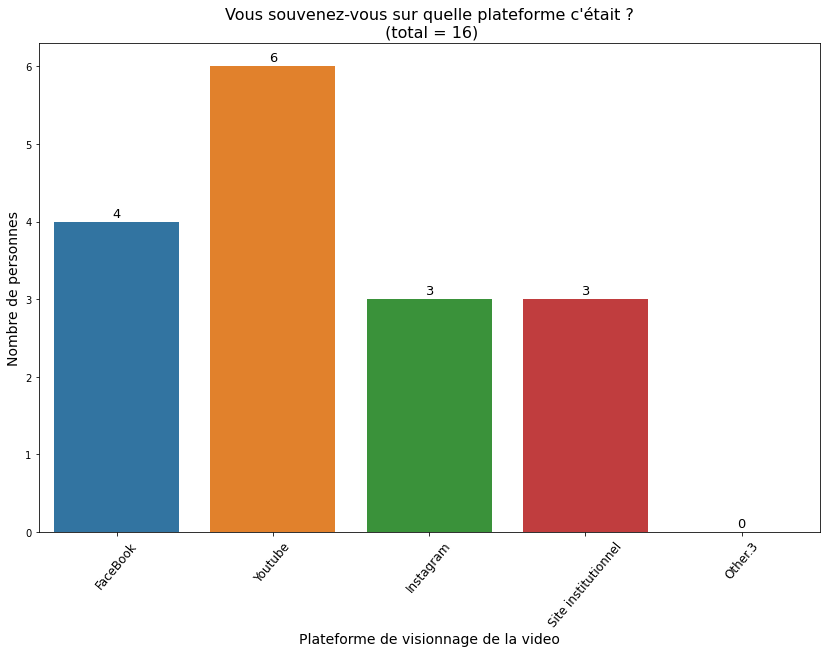

In [73]:
# Reference : https://www.geeksforgeeks.org/how-to-annotate-bars-in-barplot-with-matplotlib-in-python/
import pandas as pd
import seaborn as sns

# Renommage pour lisibilite
whichplattowatch_lbls[-2] = 'Site institutionnel'

nb_of_pips = []

for i in range(len(whichplattowatch_lbls)) :
    nb_votes = whichplattowatch_dtf[i].shape[0]
    nb_of_pips.append(nb_votes)

data = {"PlatformVisionnage" : whichplattowatch_lbls, "Nbpersonnes" : nb_of_pips}

df = pd.DataFrame(data, columns=['PlatformVisionnage', 'Nbpersonnes'])

# Defining the plot size
plt.figure(figsize=(14, 9))
  
# Defining the values for x-axis, y-axis
# and from which datafarme the values are to be picked
plots = sns.barplot(x="PlatformVisionnage", y="Nbpersonnes", data=df)
  
# Iterrating over the bars one-by-one
for bar in plots.patches:

    plots.annotate(format(bar.get_height(), '.0f'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=bar_patchsize, xytext=(0, 8),
                   textcoords='offset points')
  
# Setting the label for x-axis
plt.xlabel("Plateforme de visionnage de la video", size=bar_axislabelsize)
  
# Setting the label for y-axis
plt.ylabel("Nombre de personnes", size=bar_axislabelsize)
  
# Setting the title for the graph
plt.title(q_whichplattowatch + "\n (total = "+str(sum(nb_of_pips))+')', size = bar_titlesize)

plt.xticks(rotation=50, size = bar_ticksize)
# Si je fais des plots de taux, ajouter echelle de 0 a 100
# plt.ylim([0,100])
  
# Fianlly showing the plot
plt.show()

## 4.F - Aviez vous un compte sur cette plateforme ? ( id = ExnuASVzZF96 ) // Yes/No

In [74]:
groupidx = 3
qidq = 'ExnuASVzZF96'


# Get labels and results
# intulie d'utiliser ici le get sub question, mais c'etait pour tester
q_AviezVousUnCompte, AviezVousUnCompte_lbls, AviezVousUnCompte_dtf = tfs.get_results(gidx=groupidx, qid=qidq)

# Rappel des options :
print("Rappel des reponses possibles :\n ",AviezVousUnCompte_lbls)

Rappel des reponses possibles :
  ['oui', 'non']


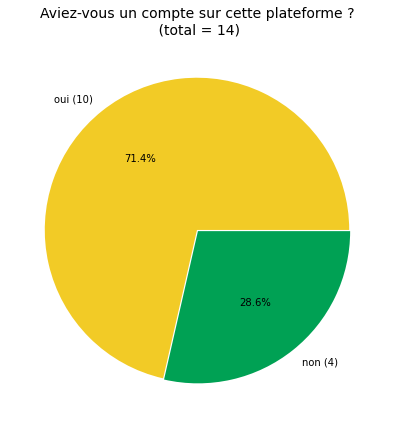

In [75]:
cln_viezVousUnCompte_lbl, cln_viezVousUnCompte_votes = mbr.clean_lists_for_cheesepie(labels=AviezVousUnCompte_lbls, values=AviezVousUnCompte_dtf)

# Juste parce que parfois certains enregistrements chient 
nb_valid_resp = 0
for i in range(len(AviezVousUnCompte_dtf)) :
    nb_valid_resp += AviezVousUnCompte_dtf[i].shape[0]

#GRAPH SET UP
#------------
# Ajouter le nombre de respondants correspondant au label
for i in range(len(cln_viezVousUnCompte_lbl)) :
    cln_viezVousUnCompte_lbl[i] += ' ('+str(cln_viezVousUnCompte_votes[i])+')'
    
# Set explode paramater based on favarite value
# Cree un tuple de la taille du nombre "clean" de labels de valeur egale a l'eclatement favoris
explode = (pie_fav_eclat,)*len(cln_viezVousUnCompte_lbl)

# show plot
fig = plt.figure(figsize =(10, 7))
plt.pie(cln_viezVousUnCompte_votes, labels = cln_viezVousUnCompte_lbl, autopct='%1.1f%%', colors=myfavcolors, explode = explode)
plt.title(q_AviezVousUnCompte +'\n (total = '+ str(nb_valid_resp) +')', size = pie_titlesize)
plt.show()

## TODO : Filtrer sur les plateformes sociales -- get_question_specific_resp_dtf

## 4.G - S'il existait un site pour ces videos, iriez-vous ? ( id = I3G4Wsg6JAGd ) // Opinion scale

In [76]:
groupidx = 3
qidq = 'I3G4Wsg6JAGd'


# Get labels and results
# intulie d'utiliser ici le get sub question, mais c'etait pour tester
q_InteretPlat, InteretPlat_lbls, InteretPlat_scale = tfs.get_results(gidx=groupidx, qid=qidq)

# Rappel des options :
print("Rappel des reponses possibles :\n ",InteretPlat_lbls)

Rappel des reponses possibles :
  ['Non. Jamais. ', 'Tous les jours !']


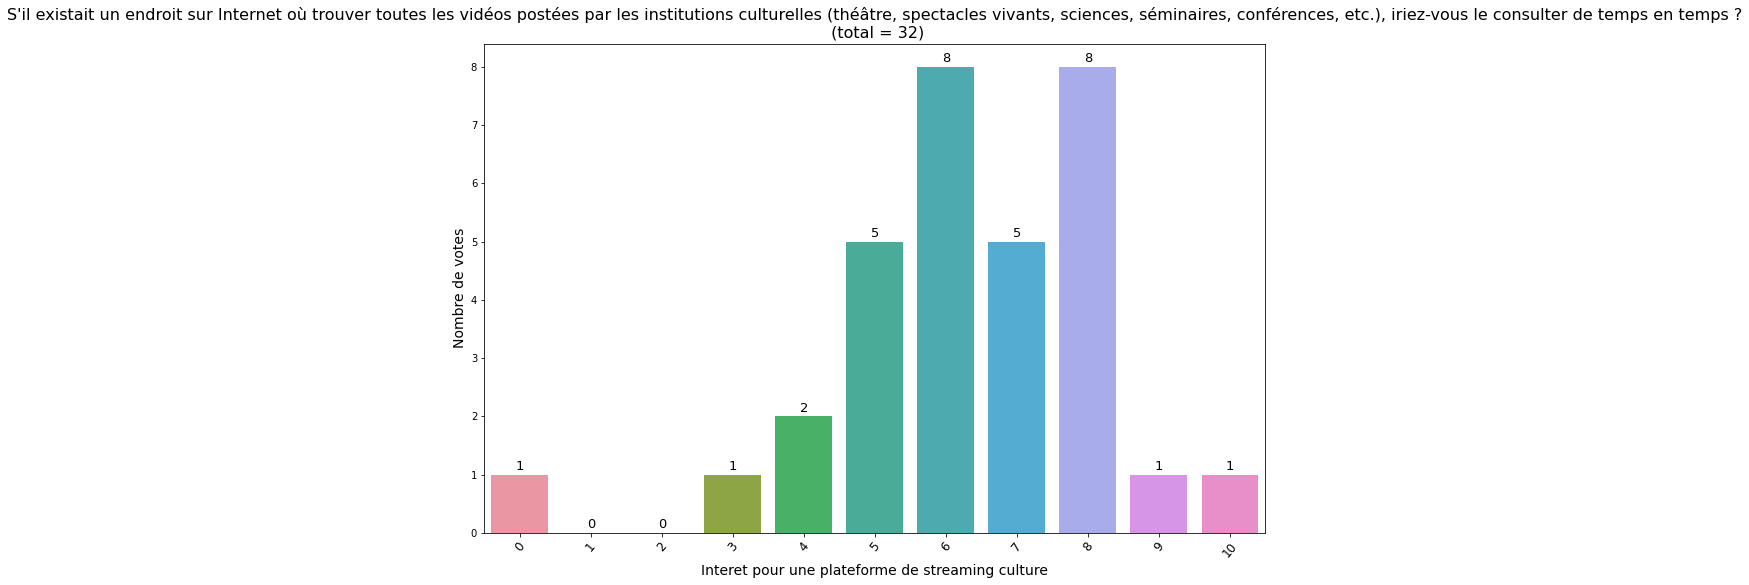

In [77]:
# Reference : https://www.geeksforgeeks.org/how-to-annotate-bars-in-barplot-with-matplotlib-in-python/
import pandas as pd
import seaborn as sns


nb_of_pips = []
moyenne_interet = 0.0
total_notes = 0

for i in range(len(InteretPlat_scale)) :
    df = form_responses[form_responses[q_InteretPlat] == InteretPlat_scale[i]]
    nb_votes = df.shape[0]
    nb_of_pips.append(nb_votes)
    total_notes += nb_votes*op_scale_c[i]

moyenne_interet = total_notes / nb_responses

data = {"Note" : op_scale_s, "Votes" : nb_of_pips}

df = pd.DataFrame(data, columns=['Note', 'Votes'])

# Defining the plot size
plt.figure(figsize=(14, 9))
  
# Defining the values for x-axis, y-axis
# and from which datafarme the values are to be picked
plots = sns.barplot(x="Note", y="Votes", data=df)
  
# Iterrating over the bars one-by-one
for bar in plots.patches:

    plots.annotate(format(bar.get_height(), '.0f'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=bar_patchsize, xytext=(0, 8),
                   textcoords='offset points')
  
# Setting the label for x-axis
plt.xlabel("Interet pour une plateforme de streaming culture", size=bar_axislabelsize)
  
# Setting the label for y-axis
plt.ylabel("Nombre de votes", size=bar_axislabelsize)
  
# Setting the title for the graph
plt.title(q_InteretPlat + "\n (total = "+str(nb_responses)+')', size = bar_titlesize)

plt.xticks(rotation=50, size = bar_ticksize)
# Si je fais des plots de taux, ajouter echelle de 0 a 100
# plt.ylim([0,100])
  
# Fianlly showing the plot
plt.show()

In [78]:
print("Interet moyen pour une plateforme de streaming culture : "+ str(moyenne_interet))

Interet moyen pour une plateforme de streaming culture : 6.3125


## TODO : Isoler ceux qui n'ont pas vu les videos culture 2020

## 4.H - Activite numeroques organisees par le service public ? ( id = VK6kxx4uSZjR ) // Multiple choice

In [79]:
groupidx = 3
qidq = 'VK6kxx4uSZjR'


# Get labels and results
# intulie d'utiliser ici le get sub question, mais c'etait pour tester
q_ActivitesNum, ActivitesNum_lbls, ActivitesNum_dtfs = tfs.get_results(gidx=groupidx, qid=qidq)

# Rappel des options :
print("Rappel des reponses possibles :\n ",ActivitesNum_lbls)

Rappel des reponses possibles :
  ["Oui, c'est super de pouvoir profiter d'autant de contenus si facilement !", "J'ai fait quelques activités en lignes ou suivi quelques replay.", "J'ai beaucoup de mal à trouver des événements qui m'interessent.", "Je n'ai pas vraiment cherché."]


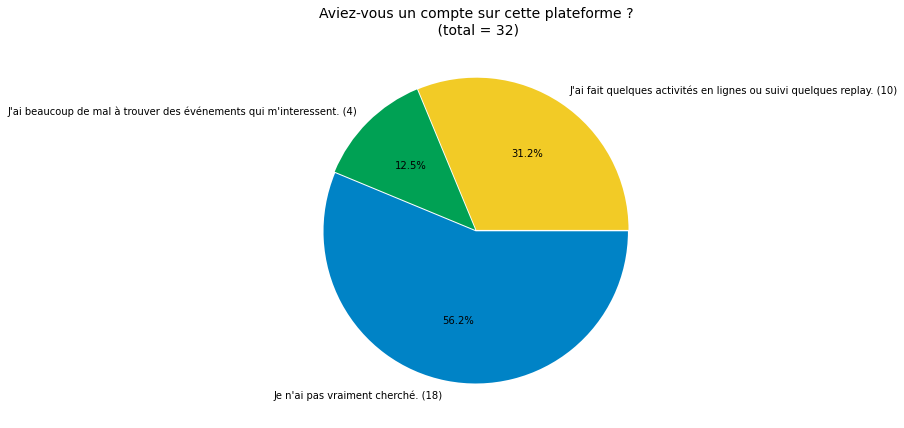

In [80]:
cln_ActivitesNum_lbl, cln_ActivitesNum_votes = mbr.clean_lists_for_cheesepie(labels=ActivitesNum_lbls, values=ActivitesNum_dtfs)

# Juste parce que parfois certains enregistrements chient 
nb_valid_resp = 0
for i in range(len(ActivitesNum_dtfs)) :
    nb_valid_resp += ActivitesNum_dtfs[i].shape[0]

#GRAPH SET UP
#------------
# Ajouter le nombre de respondants correspondant au label
for i in range(len(cln_ActivitesNum_lbl)) :
    cln_ActivitesNum_lbl[i] += ' ('+str(cln_ActivitesNum_votes[i])+')'
    
# Set explode paramater based on favarite value
# Cree un tuple de la taille du nombre "clean" de labels de valeur egale a l'eclatement favoris
explode = (pie_fav_eclat,)*len(cln_ActivitesNum_lbl)

# show plot
fig = plt.figure(figsize =(10, 7))
plt.pie(cln_ActivitesNum_votes, labels = cln_ActivitesNum_lbl, autopct='%1.1f%%', colors=myfavcolors, explode = explode)
plt.title(q_AviezVousUnCompte +'\n (total = '+ str(nb_valid_resp) +')', size = pie_titlesize)
plt.show()

## 4.I - Connaissance des institutions liees a l'IT pour le GP ( id = JN4TO5fjBNlJ ) // Multiple choice

In [81]:
groupidx = 3
qidq = 'JN4TO5fjBNlJ'


# Get labels and results
# intulie d'utiliser ici le get sub question, mais c'etait pour tester
q_Instit_IT, Instit_IT_lbls, Instit_IT_dtfs = tfs.get_results(gidx=groupidx, qid=qidq)

# Rappel des options :
print("Rappel des reponses possibles :\n ",Instit_IT_lbls)

Rappel des reponses possibles :
  ['ANSSI', 'CNIL', 'DINUM', 'INRIA', 'Aucune']


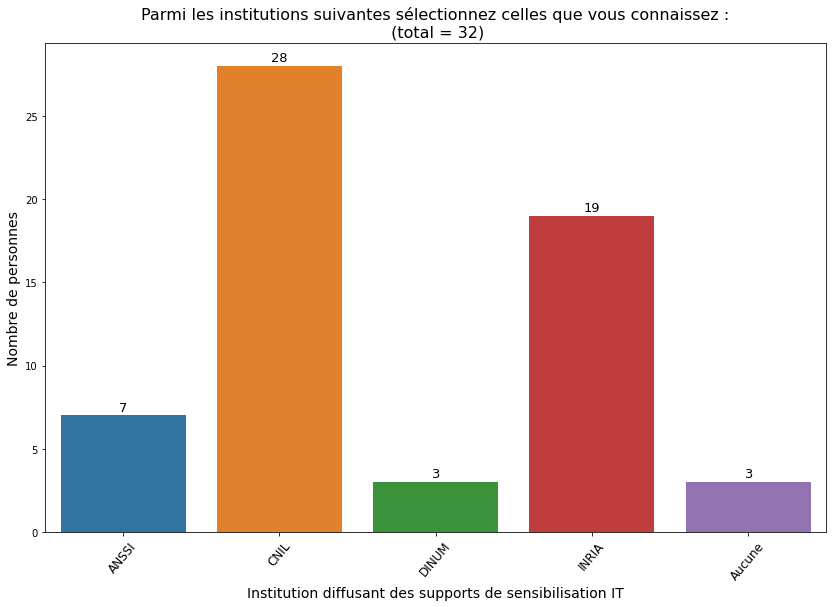

In [82]:
# Reference : https://www.geeksforgeeks.org/how-to-annotate-bars-in-barplot-with-matplotlib-in-python/
import pandas as pd
import seaborn as sns


nb_of_pips = []

for i in range(len(Instit_IT_lbls)) :
    nb_votes = Instit_IT_dtfs[i].shape[0]
    nb_of_pips.append(nb_votes)

data = {"Institution" : Instit_IT_lbls, "Nb personnes" : nb_of_pips}

df = pd.DataFrame(data, columns=['Institution', 'Nb personnes'])

# Defining the plot size
plt.figure(figsize=(14, 9))
  
# Defining the values for x-axis, y-axis
# and from which datafarme the values are to be picked
plots = sns.barplot(x="Institution", y="Nb personnes", data=df)
  
# Iterrating over the bars one-by-one
for bar in plots.patches:

    plots.annotate(format(bar.get_height(), '.0f'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=bar_patchsize, xytext=(0, 8),
                   textcoords='offset points')
  
# Setting the label for x-axis
plt.xlabel("Institution diffusant des supports de sensibilisation IT", size=bar_axislabelsize)
  
# Setting the label for y-axis
plt.ylabel("Nombre de personnes", size=bar_axislabelsize)
  
# Setting the title for the graph
plt.title(q_Instit_IT + "\n (total = "+str(nb_responses)+')', size = bar_titlesize)

plt.xticks(rotation=50, size = bar_ticksize)
# Si je fais des plots de taux, ajouter echelle de 0 a 100
# plt.ylim([0,100])
  
# Fianlly showing the plot
plt.show()

## TODO : Isoler les travailleurs publics

-------------------------------------------------------------------------

# GROUP 5 : Les sujets qui vous interessent

-------------------------------------------------------------------------

## 5.A - Les principes que doit appliquer l'etat pour ses services ( id = 0UMC41abtPgm ) // Multiple choice with other

In [83]:
groupidx = 4
qidq = '0UMC41abtPgm'


# Get labels and results
# intulie d'utiliser ici le get sub question, mais c'etait pour tester
q_principes_govIT, principes_govIT_lbls, principes_govIT_dtfs = tfs.get_results(gidx=groupidx, qid=qidq)

# Rappel des options :
print("Rappel des reponses possibles :\n ",principes_govIT_lbls)

Rappel des reponses possibles :
  ['Protection des données personnelles, Rgpd', "Green IT et écoconception des services d'informations", 'Proposer des services accessibles aux personnes en situation de handicap', "Encourager les démarches d'accès universel à la connaissance (Open source)", "Rendre accessible les données publiques et favoriser l'interopérabilité pour automatiser, et donc accélerer, les démarches administratives", 'Aucune.', 'Other.4']


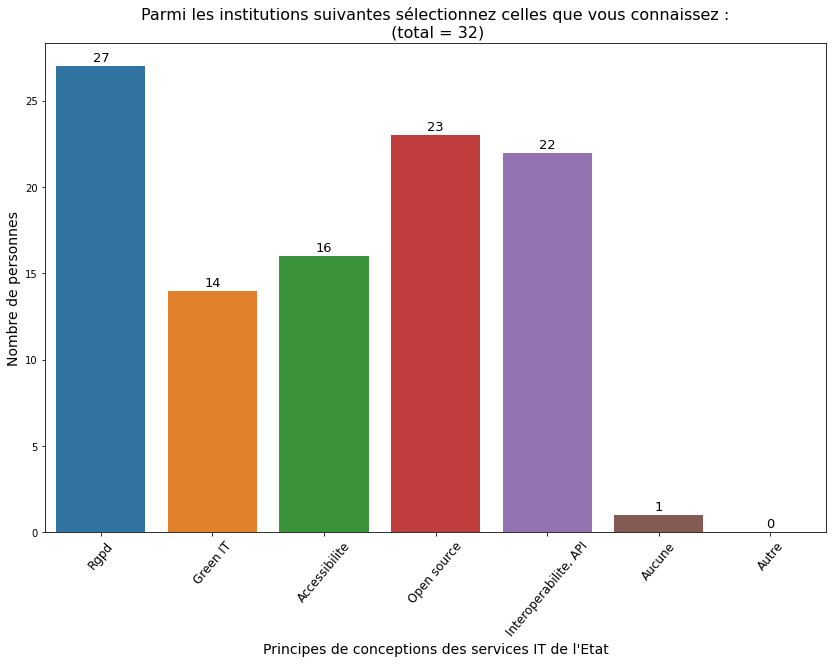

In [84]:
# Reference : https://www.geeksforgeeks.org/how-to-annotate-bars-in-barplot-with-matplotlib-in-python/
import pandas as pd
import seaborn as sns


# Modifier les labels pour lisibilite
principes_govIT_lbls = ['Rgpd', 'Green IT', 'Accessibilite', 'Open source', 'Interoperabilite, API', 'Aucune', 'Autre']


nb_of_pips = []

for i in range(len(principes_govIT_lbls)) :
    nb_votes = principes_govIT_dtfs[i].shape[0]
    nb_of_pips.append(nb_votes)

data = {"PrincipesConceptions" : principes_govIT_lbls, "Nb personnes" : nb_of_pips}

df = pd.DataFrame(data, columns=['PrincipesConceptions', 'Nb personnes'])

# Defining the plot size
plt.figure(figsize=(14, 9))
  
# Defining the values for x-axis, y-axis
# and from which datafarme the values are to be picked
plots = sns.barplot(x="PrincipesConceptions", y="Nb personnes", data=df)
  
# Iterrating over the bars one-by-one
for bar in plots.patches:

    plots.annotate(format(bar.get_height(), '.0f'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=bar_patchsize, xytext=(0, 8),
                   textcoords='offset points')
  
# Setting the label for x-axis
plt.xlabel("Principes de conceptions des services IT de l'Etat", size=bar_axislabelsize)
  
# Setting the label for y-axis
plt.ylabel("Nombre de personnes", size=bar_axislabelsize)
  
# Setting the title for the graph
plt.title(q_Instit_IT + "\n (total = "+str(nb_responses)+')', size = bar_titlesize)

plt.xticks(rotation=50, size = bar_ticksize)
# Si je fais des plots de taux, ajouter echelle de 0 a 100
# plt.ylim([0,100])
  
# Fianlly showing the plot
plt.show()

## 5.B - Interet pour l'actualite numerique ( id = UUHA1PBnrPOH ) // Opinion scale

In [85]:
groupidx = 4
qidq = 'UUHA1PBnrPOH'
# Get labels and results
q_interetIT, interetIT_lbls, interetIT_scale = tfs.get_results(gidx=groupidx,qid=qidq)

# Rappel des options :
print("Taille de l'opinion :\n ",interetIT_scale)

# form_responses = liste de toutes les reponses sous forme de dataframe

Taille de l'opinion :
  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


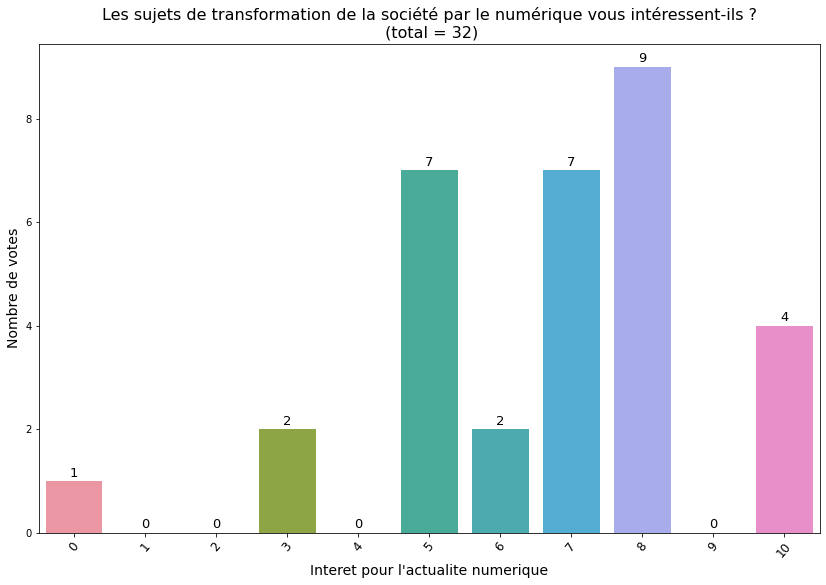

In [86]:
# Reference : https://www.geeksforgeeks.org/how-to-annotate-bars-in-barplot-with-matplotlib-in-python/
import pandas as pd
import seaborn as sns


nb_of_pips = []
moyenne_interetIT = 0.0
total_notes = 0

for i in range(len(interetIT_scale)) :
    df = form_responses[form_responses[q_interetIT] == interetIT_scale[i]]
    nb_votes = df.shape[0]
    nb_of_pips.append(nb_votes)
    total_notes += nb_votes*interetIT_scale[i]

moyenne_interetIT = total_notes / nb_responses

data = {"Note" : interetIT_scale, "Votes" : nb_of_pips}

df = pd.DataFrame(data, columns=['Note', 'Votes'])

# Defining the plot size
plt.figure(figsize=(14, 9))
  
# Defining the values for x-axis, y-axis
# and from which datafarme the values are to be picked
plots = sns.barplot(x="Note", y="Votes", data=df)
  
# Iterrating over the bars one-by-one
for bar in plots.patches:

    plots.annotate(format(bar.get_height(), '.0f'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=bar_patchsize, xytext=(0, 8),
                   textcoords='offset points')
  
# Setting the label for x-axis
plt.xlabel("Interet pour l'actualite numerique", size=bar_axislabelsize)
  
# Setting the label for y-axis
plt.ylabel("Nombre de votes", size=bar_axislabelsize)
  
# Setting the title for the graph
plt.title(q_interetIT + "\n (total = "+str(nb_responses)+')', size = bar_titlesize)

plt.xticks(rotation=50, size = bar_ticksize)
# Si je fais des plots de taux, ajouter echelle de 0 a 100
# plt.ylim([0,100])
  
# Fianlly showing the plot
plt.show()

In [87]:
print("Moyenne d'interet pour les sujets IT : "+ str(moyenne_interetIT))

Moyenne d'interet pour les sujets IT : 6.6875


## 5.C - Quels sujets vous interessent le plus ? ( id = JYDLq41DRqDO ) // Multiple choice

In [88]:
groupidx = 4
qidq = 'JYDLq41DRqDO'
# Get labels and results
q_interets_news, interets_news_lbls, interets_news_dtfs = tfs.get_results(gidx=groupidx,qid=qidq)

# Rappel des options :
print("Taille de l'opinion :\n ",interets_news_lbls)

# form_responses = liste de toutes les reponses sous forme de dataframe

Taille de l'opinion :
  ["Toutes les dernieres tendances en matière d'innovation technologique", 'Comment le numérique influt-il sur nos droits et nos libertés ? Quels sont les risques et menaces (reconnaissance faciale, manipulation des masses, etc.) ?', "Comment les technologies permettent la création de réseaux sociaux humains et l'émergence de sous-cultures ou de mouvements de mobilisation populaires", 'Les nouveaux business qui émergent sur internet (le drop shipping, les NFTs, les cryptomonnaies, etc.)', "Les applications de l'informatique aux autres domaines de la connaissance : santé, social, astrophysique, architecture, design, mode, etc.", 'Other.5']


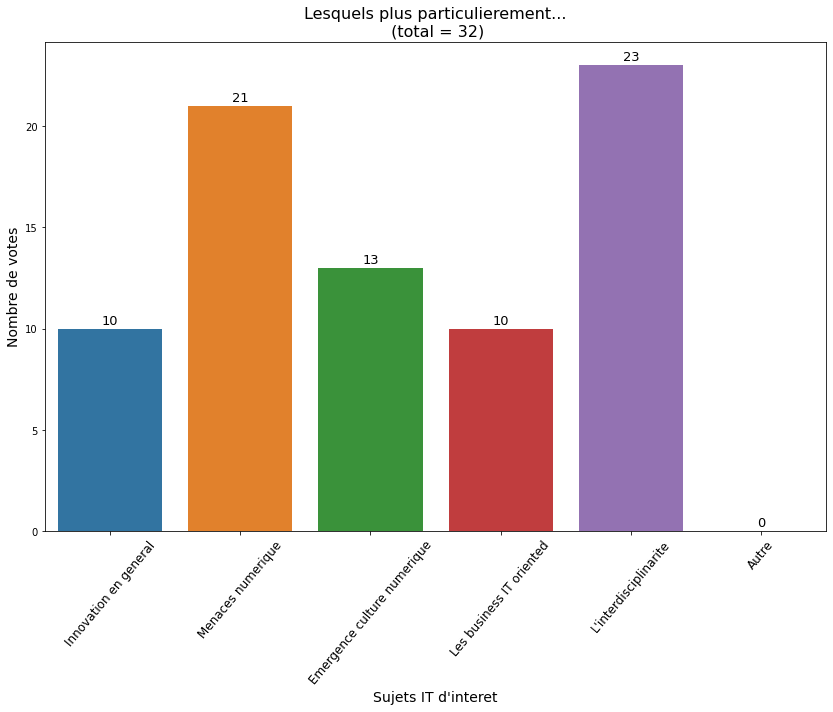

In [89]:
# Reference : https://www.geeksforgeeks.org/how-to-annotate-bars-in-barplot-with-matplotlib-in-python/
import pandas as pd
import seaborn as sns

# Modifier les labels pour lisibilite
interets_news_lbls = ['Innovation en general', 'Menaces numerique', 'Emergence culture numerique', 'Les business IT oriented', "L'interdisciplinarite", 'Autre']


nb_of_pips = []
total_notes = 0

for i in range(len(interets_news_lbls)) :
    nb_votes = interets_news_dtfs[i].shape[0]
    nb_of_pips.append(nb_votes)

data = {"SujetInteret" : interets_news_lbls, "Nb personnes" : nb_of_pips}

df = pd.DataFrame(data, columns=['SujetInteret', 'Nb personnes'])

# Defining the plot size
plt.figure(figsize=(14, 9))
  
# Defining the values for x-axis, y-axis
# and from which datafarme the values are to be picked
plots = sns.barplot(x="SujetInteret", y="Nb personnes", data=df)
  
# Iterrating over the bars one-by-one
for bar in plots.patches:

    plots.annotate(format(bar.get_height(), '.0f'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=bar_patchsize, xytext=(0, 8),
                   textcoords='offset points')
  
# Setting the label for x-axis
plt.xlabel("Sujets IT d'interet", size=bar_axislabelsize)
  
# Setting the label for y-axis
plt.ylabel("Nombre de votes", size=bar_axislabelsize)
  
# Setting the title for the graph
plt.title(q_interets_news + "\n (total = "+str(nb_responses)+')', size = bar_titlesize)

plt.xticks(rotation=50, size = bar_ticksize)
# Si je fais des plots de taux, ajouter echelle de 0 a 100
# plt.ylim([0,100])
  
# Fianlly showing the plot
plt.show()

## 5.D - Comment vous tenez vous informes des nezws IT ? ( id = 6MdurgsnsBfD ) // Multiple choice

In [90]:
groupidx = 4
qidq = '6MdurgsnsBfD'
# Get labels and results
q_howdoyounewsIT, howdoyounewsIT_lbls, howdoyounewsIT_dtfs = tfs.get_results(gidx=groupidx,qid=qidq)

# Rappel des options :
print("Taille de l'opinion :\n ",howdoyounewsIT_lbls)

# form_responses = liste de toutes les reponses sous forme de dataframe

Taille de l'opinion :
  ['Je lis les articles sur ces sujets qui sont publiés dans mes quotidiens habituels', "Je suis abonnés à quelques institutions ou entreprises de l'informatique sur les réseaux", 'Je consulte régulièrement des sites ou magazines spécialisés', 'Je vais régulièrement sur des sites type Reddit ou Hackernews où une communauté de passionnés partage ses articles', 'Other.6']


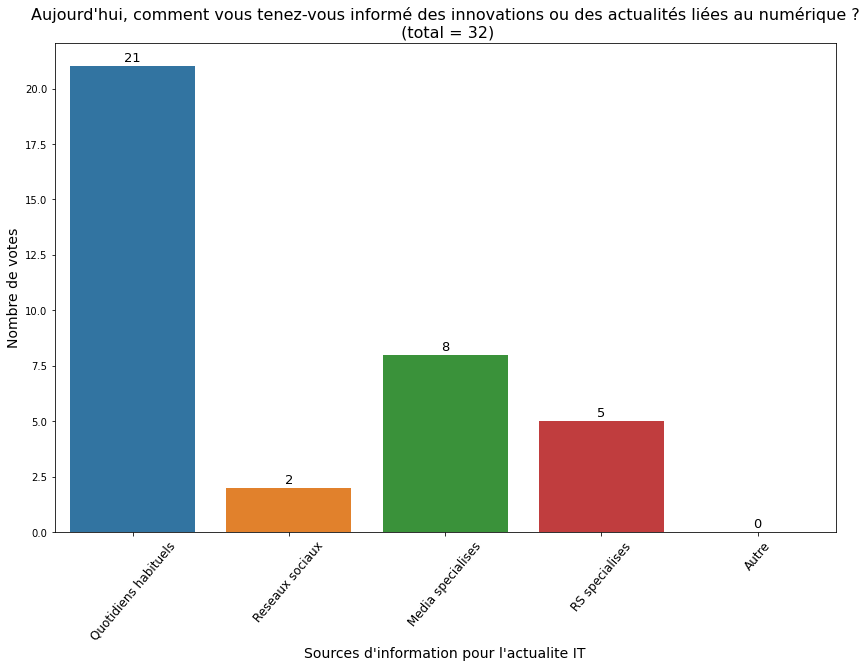

In [91]:
# Reference : https://www.geeksforgeeks.org/how-to-annotate-bars-in-barplot-with-matplotlib-in-python/
import pandas as pd
import seaborn as sns


# Modifier les labels pour lisibilite
howdoyounewsIT_lbls = ['Quotidiens habituels', 'Reseaux sociaux', 'Media specialises', 'RS specialises', 'Autre']

nb_of_pips = []

for i in range(len(howdoyounewsIT_lbls)) :
    nb_votes = howdoyounewsIT_dtfs[i].shape[0]
    nb_of_pips.append(nb_votes)

data = {"HowdoUnewsIT" : howdoyounewsIT_lbls, "Nb personnes" : nb_of_pips}

df = pd.DataFrame(data, columns=['HowdoUnewsIT', 'Nb personnes'])

# Defining the plot size
plt.figure(figsize=(14, 9))
  
# Defining the values for x-axis, y-axis
# and from which datafarme the values are to be picked
plots = sns.barplot(x="HowdoUnewsIT", y="Nb personnes", data=df)
  
# Iterrating over the bars one-by-one
for bar in plots.patches:

    plots.annotate(format(bar.get_height(), '.0f'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=bar_patchsize, xytext=(0, 8),
                   textcoords='offset points')
  
# Setting the label for x-axis
plt.xlabel("Sources d'information pour l'actualite IT", size=bar_axislabelsize)
  
# Setting the label for y-axis
plt.ylabel("Nombre de votes", size=bar_axislabelsize)
  
# Setting the title for the graph
plt.title(q_howdoyounewsIT + "\n (total = "+str(nb_responses)+')', size = bar_titlesize)

plt.xticks(rotation=50, size = bar_ticksize)
# Si je fais des plots de taux, ajouter echelle de 0 a 100
# plt.ylim([0,100])
  
# Fianlly showing the plot
plt.show()

------------------------------------------------------------------------------------------------

# GROUP 6 : Pour conclure

------------------------------------------------------------------------------------------------

## 6.A - Connaissez-vous un musee de l'informatique ? ( id = t656hX85mrxs ) // multiple_choice

In [92]:
groupidx = 5
qidq = 't656hX85mrxs'
# Get labels and results
q_doyouknoITmuseum, doyouknoITmuseum_lbls, doyouknoITmuseum_dtfs = tfs.get_results(gidx=groupidx,qid=qidq)

# Rappel des options :
print("Taille de l'opinion :\n ",doyouknoITmuseum_lbls)

# form_responses = liste de toutes les reponses sous forme de dataframe

Taille de l'opinion :
  ['Oui, en France', "Oui, à l'étranger", 'Non']


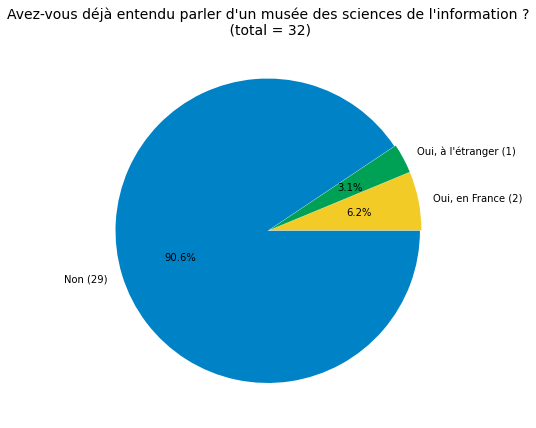

In [93]:
cln_doyouknoITmuseumlbl, cln_doyouknoITmuseum_votes = mbr.clean_lists_for_cheesepie(labels=doyouknoITmuseum_lbls, values=doyouknoITmuseum_dtfs)

# Juste parce que parfois certains enregistrements chient 
nb_valid_resp = 0
for i in range(len(doyouknoITmuseum_dtfs)) :
    nb_valid_resp += doyouknoITmuseum_dtfs[i].shape[0]

#GRAPH SET UP
#------------
# Ajouter le nombre de respondants correspondant au label
for i in range(len(cln_doyouknoITmuseumlbl)) :
    cln_doyouknoITmuseumlbl[i] += ' ('+str(cln_doyouknoITmuseum_votes[i])+')'
    
# Set explode paramater based on favarite value
# Cree un tuple de la taille du nombre "clean" de labels de valeur egale a l'eclatement favoris
explode = (pie_fav_eclat,)*len(cln_doyouknoITmuseumlbl)

# show plot
fig = plt.figure(figsize =(10, 7))
plt.pie(cln_doyouknoITmuseum_votes, labels = cln_doyouknoITmuseumlbl, autopct='%1.1f%%', colors=myfavcolors, explode = explode)
plt.title(q_doyouknoITmuseum +'\n (total = '+ str(nb_valid_resp) +')', size = pie_titlesize)
plt.show()

## 6.B Nom du musee en question ( id = pfpA6xbQM1dT ) // long text

Retourne les dix premiers noms qu'il trouve

In [94]:
groupidx = 5
qidq = 'pfpA6xbQM1dT'
# Get labels and results
q_gibmename, gibmename_lbls, gibmename_dtfs = tfs.get_results(gidx=groupidx,qid=qidq)

# Rappel des options :
print("Taille de l'opinion :\n ",gibmename_lbls)

Taille de l'opinion :
  ['Frees speech']


In [101]:
gibmename_dtfs[0][q_gibmename].head(10)

17                               MO5
19                  C'est aux States
25    Musée de Cannes d'Informatique
Name: Super ! Pourriez-vous m'indiquer son nom ?, dtype: object

## 6.C - Pensez-vous que ce serait une bonne idee d'en avoir un ? ( id = bs6B4DKzBtxP ) // rating

In [95]:
groupidx = 5
qidq = 'bs6B4DKzBtxP'


# Get labels and results
# intulie d'utiliser ici le get sub question, mais c'etait pour tester
q_ratingITmuseum, ratingITmuseum_notes, ratingITmuseum_dtf = tfs.get_results(gidx=groupidx, qid=qidq)

# Rappel des options :
print("Rappel des reponses possibles :\n ",ratingITmuseum_notes)

Rappel des reponses possibles :
  [1, 2, 3, 4, 5]


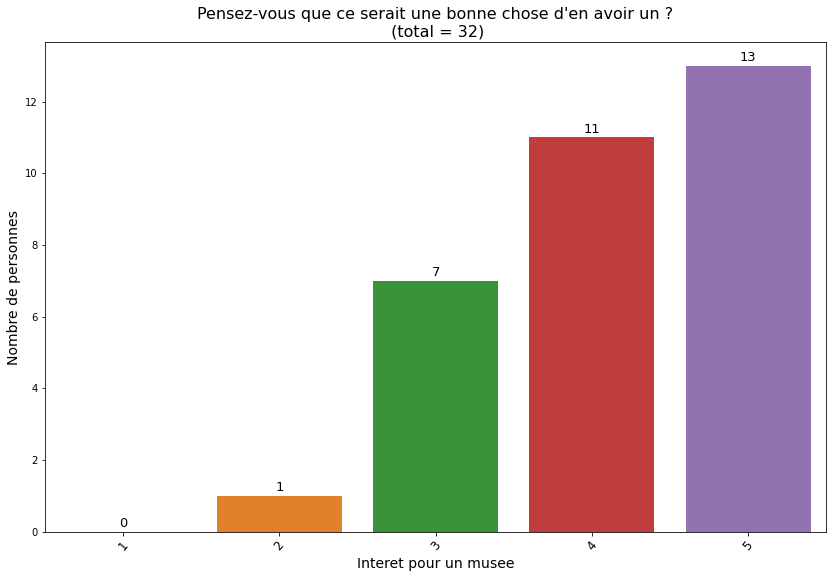

In [96]:
# Reference : https://www.geeksforgeeks.org/how-to-annotate-bars-in-barplot-with-matplotlib-in-python/
import pandas as pd
import seaborn as sns


nb_of_pips = []
moyenne_interetMusee = 0.0
total_notes = 0.0

for i in range(len(ratingITmuseum_notes)) :
    nb_votes = ratingITmuseum_dtf[i].shape[0]
    nb_of_pips.append(nb_votes)
    total_notes += nb_votes*interetIT_scale[i]

moyenne_interetMusee = total_notes / nb_responses

if sum(nb_of_pips) != 0 :
    data = {"wantmusee" : ratingvid_notes, "Nbpersonnes" : nb_of_pips}

    df = pd.DataFrame(data, columns=['wantmusee', 'Nbpersonnes'])

    # Defining the plot size
    plt.figure(figsize=(14, 9))
    
    # Defining the values for x-axis, y-axis
    # and from which datafarme the values are to be picked
    plots = sns.barplot(x="wantmusee", y="Nbpersonnes", data=df)
    
    # Iterrating over the bars one-by-one
    for bar in plots.patches:

        plots.annotate(format(bar.get_height(), '.0f'), 
                    (bar.get_x() + bar.get_width() / 2, 
                        bar.get_height()), ha='center', va='center',
                    size=bar_patchsize, xytext=(0, 8),
                    textcoords='offset points')
    
    # Setting the label for x-axis
    plt.xlabel("Interet pour un musee", size=bar_axislabelsize)
    
    # Setting the label for y-axis
    plt.ylabel("Nombre de personnes", size=bar_axislabelsize)
    
    # Setting the title for the graph
    plt.title(q_ratingITmuseum + "\n (total = "+str(nb_responses)+')', size = bar_titlesize)

    plt.xticks(rotation=50, size = bar_ticksize)
    # Si je fais des plots de taux, ajouter echelle de 0 a 100
    # plt.ylim([0,100])
    
    # Fianlly showing the plot
    plt.show()
else :
    print ('Nobody answered')

In [97]:
print('Moyenne interet Musee : ' + str(moyenne_interetMusee) )

Moyenne interet Musee : 3.125


## TODO : Mettre en rapport avec l'interet moyen pour les autres sujets

## 6.E - Plutot public ou prive ? ( id = kMJmPLtGWg8U ) // Multiple choice (mais en single)

In [98]:
groupidx = 5
qidq = 'kMJmPLtGWg8U'


# Get labels and results
# intulie d'utiliser ici le get sub question, mais c'etait pour tester
q_publicouprive, publicouprive_lbls, publicouprive_dtf = tfs.get_results(gidx=groupidx, qid=qidq)

# Rappel des options :
print("Rappel des reponses possibles :\n ",publicouprive_lbls)

POOOOO
Rappel des reponses possibles :
  ["Plutôt public : La connaissance doit etre accessible a tous les citoyens également, et c'est le rôle de l'Etat de s'en assurer. Il doit proteger et nourrir le patrimoine en développant sa culture.", "Plutôt privé : Car l'obligation de rentabilité économique et la souplesse administrative sont les plus puissants vecteurs d'innovation d'un marché globalisé", 'Other.7']


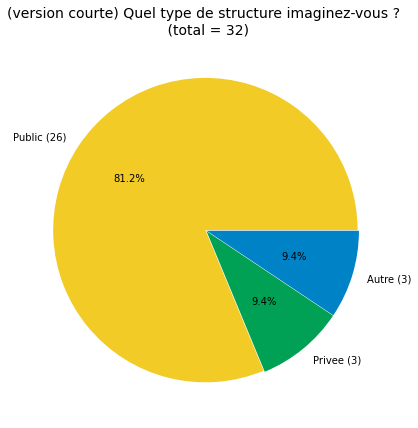

In [102]:
cln_publicouprive_lbl, cln_publicouprive_votes = mbr.clean_lists_for_cheesepie(labels=publicouprive_lbls, values=publicouprive_dtf)

# Modification des labels pour lisibilite
cln_publicouprive_lbl = ['Public', 'Privee', 'Autre']

# Juste parce que parfois certains enregistrements chient 
nb_valid_resp = 0
for i in range(len(publicouprive_dtf)) :
    nb_valid_resp += publicouprive_dtf[i].shape[0]

#GRAPH SET UP
#------------
# Ajouter le nombre de respondants correspondant au label
for i in range(len(cln_publicouprive_lbl)) :
    cln_publicouprive_lbl[i] += ' ('+str(cln_publicouprive_votes[i])+')'
    
# Set explode paramater based on favarite value
# Cree un tuple de la taille du nombre "clean" de labels de valeur egale a l'eclatement favoris
explode = (pie_fav_eclat,)*len(cln_publicouprive_lbl)

# show plot
fig = plt.figure(figsize =(10, 7))
plt.pie(cln_publicouprive_votes, labels = cln_publicouprive_lbl, autopct='%1.1f%%', colors=myfavcolors, explode = explode)
plt.title('(version courte) Quel type de structure imaginez-vous ? ' +'\n (total = '+ str(nb_valid_resp) +')', size = pie_titlesize)
plt.show()

## TODO : Aller checker les "autres"